In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
np.random.seed(3)
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn import tree
import graphviz
from sklearn import svm
import seaborn as sn
import tensorflow as tf
tf.set_random_seed(3)
from sklearn.model_selection import learning_curve

In [6]:
data = pd.read_csv('../Data/Mobile Price Classification.csv')
X = data[data.columns[:-1]]

X = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=data.columns[:-1])

y = data['price_range']


# Split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=3)

In [3]:
Kmean = KMeans(n_clusters=4,random_state=3)
Kmean.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [4]:
Kmean.inertia_ 

2892.872673659359

In [5]:
Kmean.score(X_test)

-1236.973264976827

In [6]:
# plt.plot(score_diff_alg[:20],color = 'r', label = 'ball_tree')
# plt.plot(score_diff_alg[20:40],color = 'g', label= 'kd_tree')
# plt.plot(score_diff_alg[40:60],color = 'b',label = 'brute')
# plt.legend(loc="best")
# # plt.xticks(np.arange(len(score_diff_alg[:50])), [i for i in range(1,51)])
# plt.ylabel('Accuracy')
# plt.xlabel('Number of Neighbor (5 times)')
# plt.title('Accuracy in each Number of Neighbor')

In [7]:
init = ['k-means++','random']
algorithm = ['full','elkan']
precompute_distance = [True,False]

Text(0.5,1,'Performance in Different K')

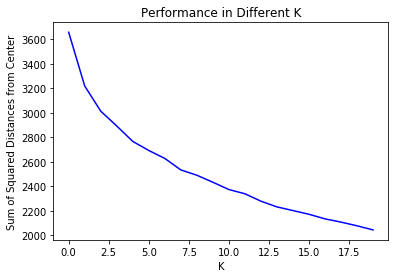

In [9]:
k_init_score = []
k_test_score = []
for i in range(1,21):
    Kmean = KMeans(n_clusters=i,random_state=3)
    Kmean.fit(X_train)
    k_init_score.append(Kmean.inertia_)
    k_test_score.append(Kmean.score(X_test))
# plt.figure(figsize=(20,15))
plt.plot(k_init_score,'b')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different K')

In [8]:
k_init_score = []
for initial in init:
    for i in range(1,31):
        Kmean = KMeans(n_clusters=i,random_state=3,init=initial)
        Kmean.fit(X_train)
        k_init_score.append(Kmean.inertia_)

Text(0.5,1,'Performance in Different initialization method')

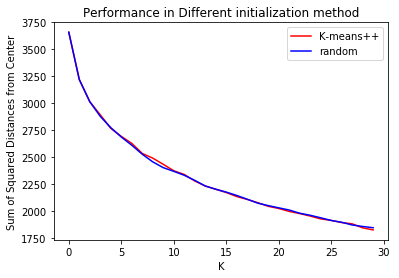

In [9]:
plt.plot(k_init_score[:30],'r',label='K-means++')
plt.plot(k_init_score[-30:],'b',label='random')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different initialization method')

Text(0.5,1,'Performance in Different Alogrithm')

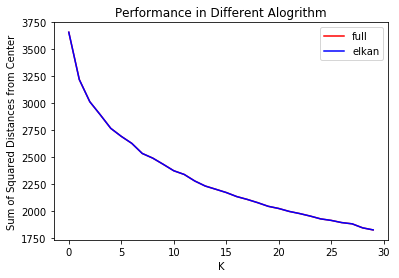

In [10]:
k_alg_score = []
for alg in algorithm:
    for i in range(1,31):
        Kmean = KMeans(n_clusters=i,random_state=3,algorithm=alg)
        Kmean.fit(X_train)
        k_alg_score.append(Kmean.inertia_)
plt.plot(k_alg_score[:30],'r',label = 'full')
plt.plot(k_alg_score[-30:],'b',label = 'elkan')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different Alogrithm')

Precompute_distance is: True
Time: 0:00:04.238998
Precompute_distance is: False
Time: 0:00:04.145002


Text(0.5,1,'Performance Difference')

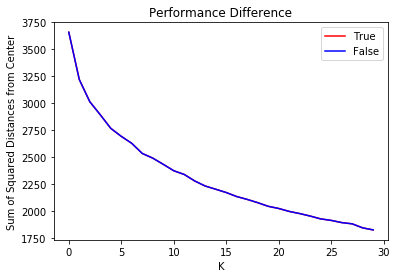

In [11]:
k_pre_score = []
for pre_cal in precompute_distance:
    start = datetime.now()
    for i in range(1,31):
        Kmean = KMeans(n_clusters=i,random_state=3,precompute_distances=pre_cal)
        Kmean.fit(X_train)
        k_pre_score.append(Kmean.inertia_)
    print('Precompute_distance is:',str(pre_cal))
    print('Time:',datetime.now()-start)
plt.plot(k_pre_score[:30],'r',label='True')
plt.plot(k_pre_score[-30:],'b',label='False')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance Difference')

Text(0.5,1,'Performance in Different tolerance')

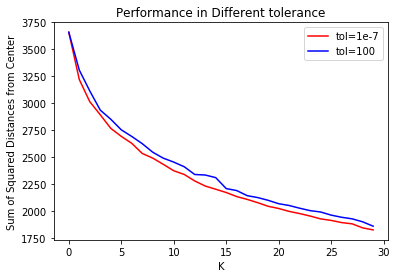

In [12]:
k_tol_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,max_iter=30000,tol=1e-7)
    Kmean.fit(X_train)
    k_tol_score.append(Kmean.inertia_)
    
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,max_iter=30000,tol=100)
    Kmean.fit(X_train)
    k_tol_score.append(Kmean.inertia_)
    
plt.plot(k_tol_score[:30],'r',label='tol=1e-7')
plt.plot(k_tol_score[-30:],'b',label='tol=100')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different tolerance')

Text(0.5,1,'Performance in Different max of iteration')

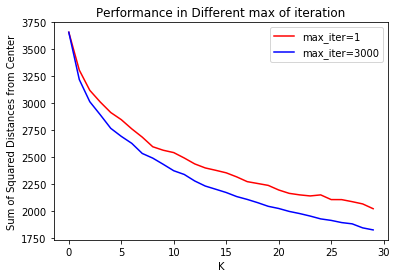

In [13]:
k_max_iter_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,max_iter=1,tol=1e-7)
    Kmean.fit(X_train)
    k_max_iter_score.append(Kmean.inertia_)
    
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,max_iter=3000,tol=1e-7)
    Kmean.fit(X_train)
    k_max_iter_score.append(Kmean.inertia_)
    
plt.plot(k_max_iter_score[:30],'r',label='max_iter=1')
plt.plot(k_max_iter_score[-30:],'b',label='max_iter=3000')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different max of iteration')

Text(0.5,1,'Performance in Different Number of Time with Different Centroid Seeds')

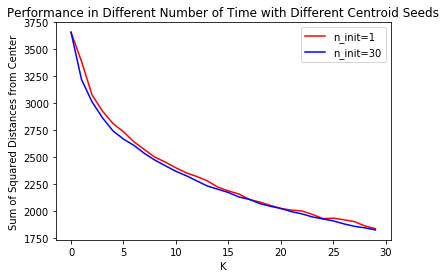

In [14]:
k_init_state_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,n_init=1)
    Kmean.fit(X_train)
    k_init_state_score.append(Kmean.inertia_)
    
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,n_init=30)
    Kmean.fit(X_train)
    k_init_state_score.append(Kmean.inertia_)
    
plt.plot(k_init_state_score[:30],'r',label='n_init=1')
plt.plot(k_init_state_score[-30:],'b',label='n_init=30')
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different Number of Time with Different Centroid Seeds')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

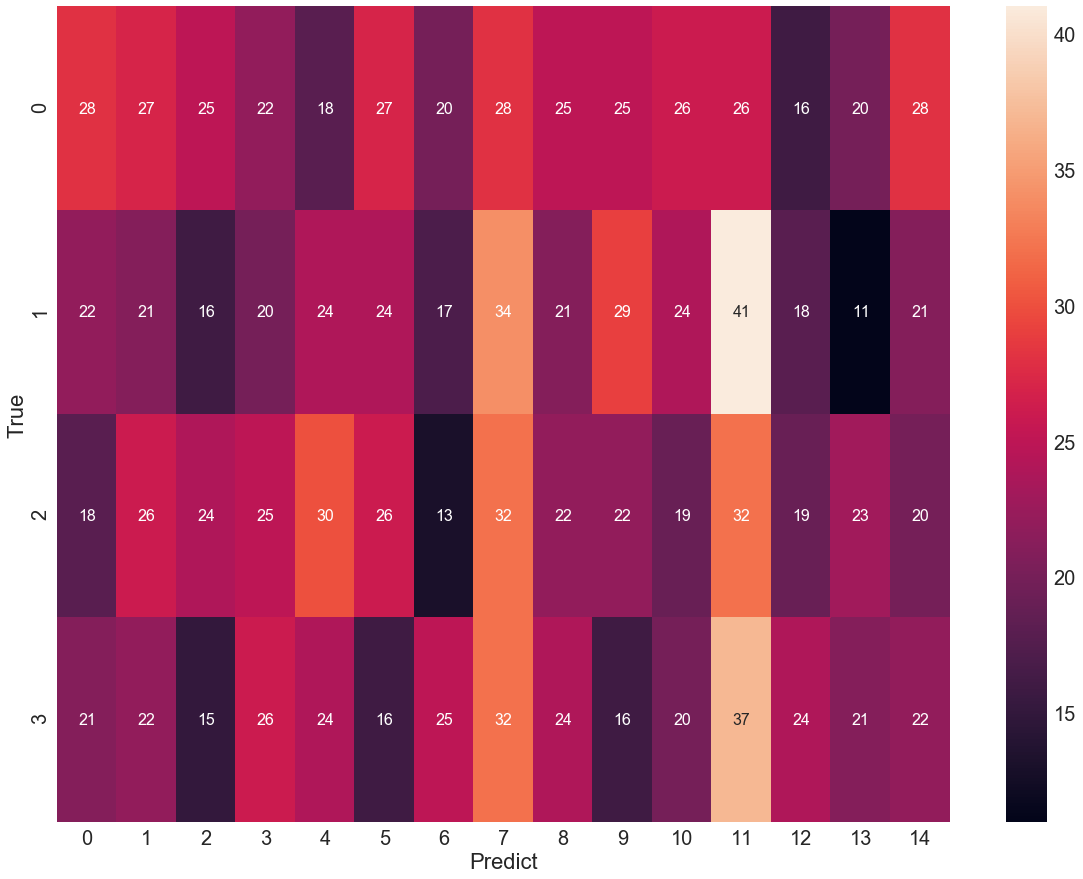

In [69]:
Kmean = KMeans(n_clusters=15,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
Kmean.fit(X_train)

K_label = Kmean.labels_

y_train_kmean = pd.DataFrame(y_train)
y_train_kmean['predict'] = K_label

price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]

list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_kmean[y_train_kmean['price_range']==pr]['predict'] == pred).sum())

data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:60]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

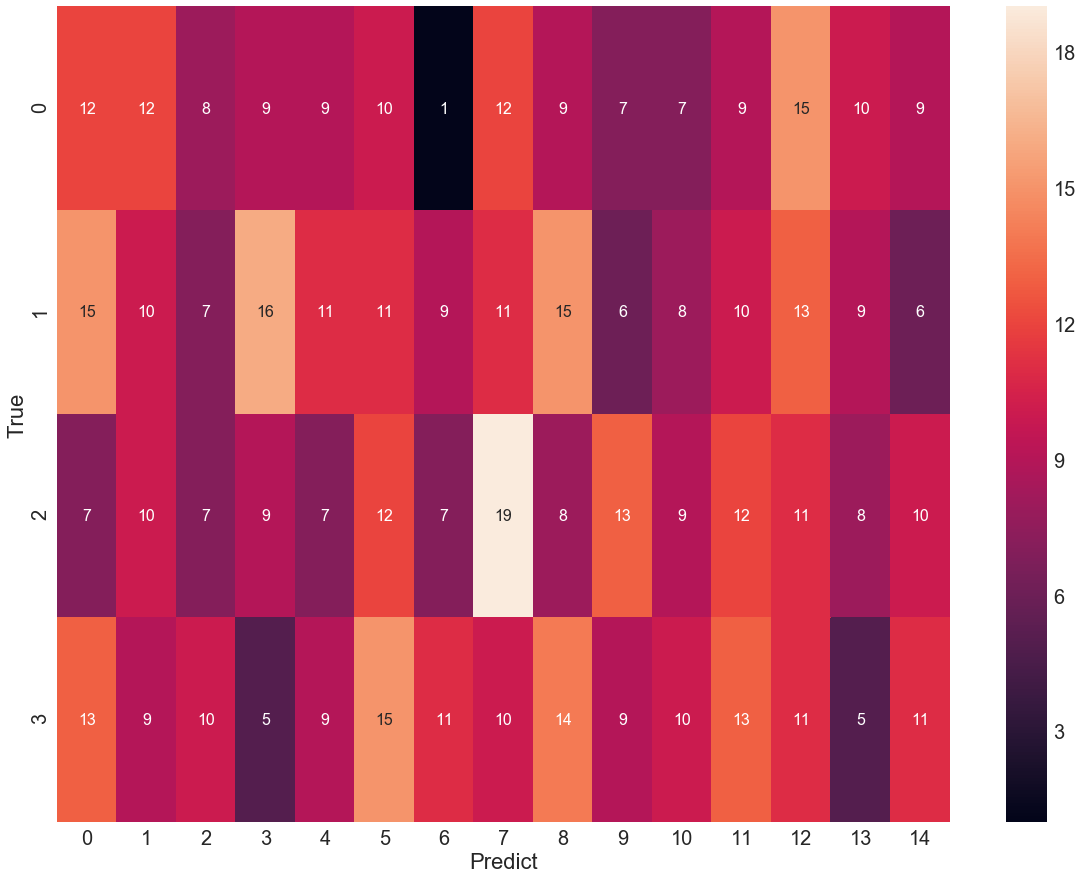

In [70]:
K_label = Kmean.predict(X_test)
y_test_kmean = pd.DataFrame(y_test)
y_test_kmean['predict'] = K_label

price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]

list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_kmean[y_test_kmean['price_range']==pr]['predict'] == pred).sum())

data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:60]])
DF = pd.DataFrame(data)

sn.set(font_scale=2)#for label size
plt.figure(figsize=(20,15))
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

In [223]:
# Kmean = KMeans(n_clusters=4,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
# Kmean.fit(X)
# K_label = Kmean.labels_
# y = pd.DataFrame(y)
# y['predict'] = K_label
# price_range_list = [0,1,2,3]
# predict_range_list = [i for i in range(4)]
# list_ = []
# for pr in price_range_list:
#     for pred in predict_range_list:
#         list_.append((y[y['price_range']==pr]['predict'] == pred).sum())
# data = np.array([list_[:4],list_[4:8],list_[8:12],list_[12:16]])
# DF = pd.DataFrame(data)

# sn.set(font_scale=2)#for label size
# ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
# ax.set(xlabel='Predict', ylabel='True')

In [7]:
n_components = [i for i in range(1,31)]
covariance_type = ['full','tied','diag','spherical']
init_params = ['kmeans','random']
#n_init = [i for i in range(1,11)]
n_init = [1,5,10,15,20]

Text(0.5,1,'Performance in Different K')

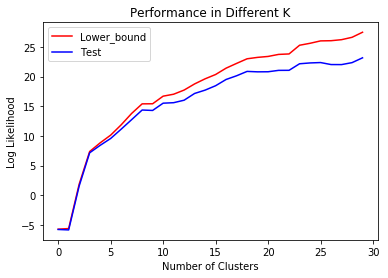

In [8]:
EM_comp_score_low = []
EM_comp_score =[]
for comp in n_components:
    EM = GaussianMixture(n_components=comp,init_params='kmeans',random_state=3)
    EM.fit(X_train)
    EM_comp_score_low.append(EM.lower_bound_)
    EM_comp_score.append(EM.score(X_test))

plt.plot(EM_comp_score_low,'r',label='Lower_bound')
plt.plot(EM_comp_score,'b',label='Test')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different K')

In [74]:
EM_cov_score =[]
EM_cov_score_low = []
for cov in covariance_type:
    for comp in n_components: 
        EM = GaussianMixture(n_components=comp,init_params='kmeans',random_state=3,covariance_type=cov)
        EM.fit(X_train)
        EM_cov_score_low.append(EM.lower_bound_)
        EM_cov_score.append(EM.score(X_test))

Text(0.5,1,'Performance in Different Covariance Type')

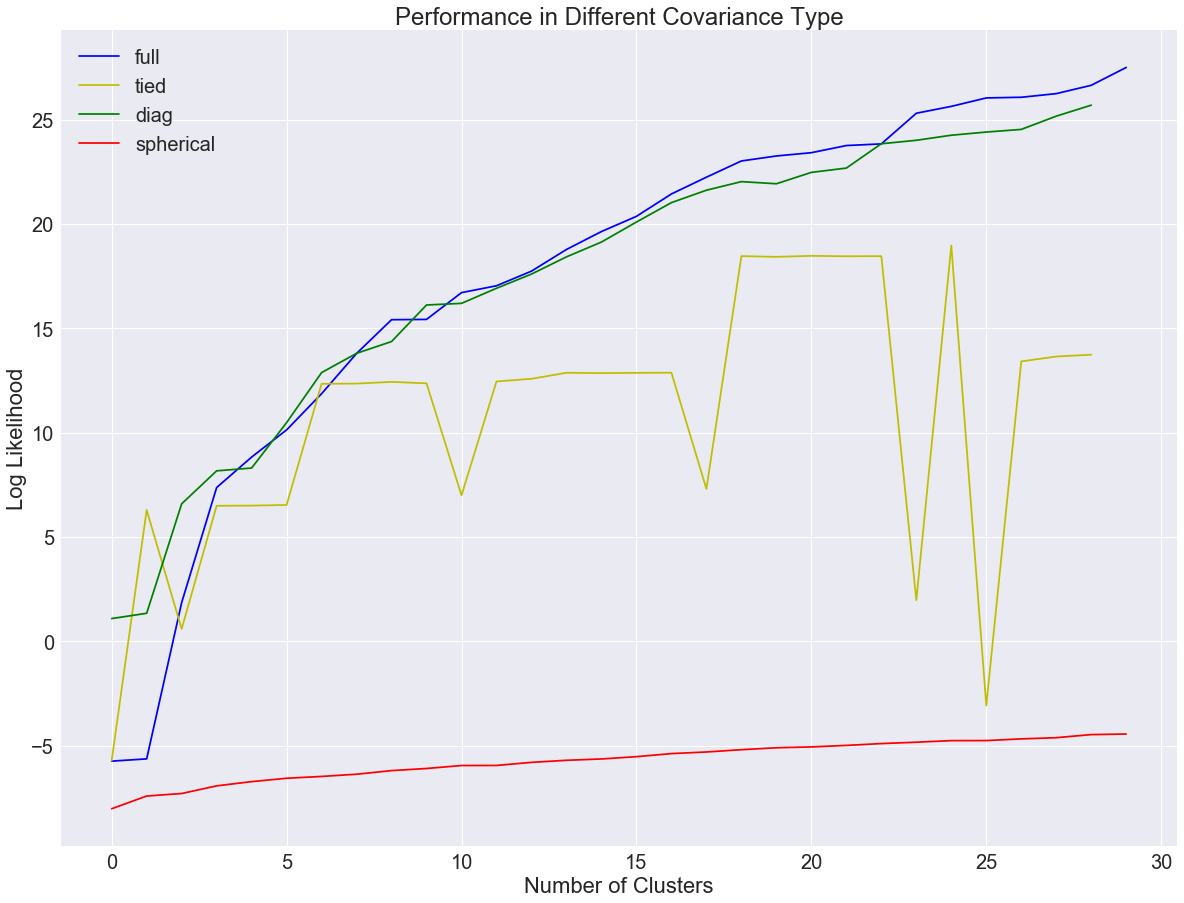

In [77]:
plt.figure(figsize=(20,15))
plt.plot(EM_cov_score_low[:30],'b',label='full')
plt.plot(EM_cov_score_low[31:60],'y',label='tied')
plt.plot(EM_cov_score_low[61:90],'g',label='diag')
plt.plot(EM_cov_score_low[-30:],'r',label='spherical')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different Covariance Type')

In [79]:
EM_init_method_score =[]
EM_init_method_score_low = []
for init in init_params:
    for comp in n_components: 
        EM = GaussianMixture(n_components=comp,init_params=init,random_state=3,covariance_type='full')
        EM.fit(X_train)
        EM_init_method_score_low.append(EM.lower_bound_)
        EM_init_method_score.append(EM.score(X_test))

Text(0.5,1,'Performance in Different Initial Method')

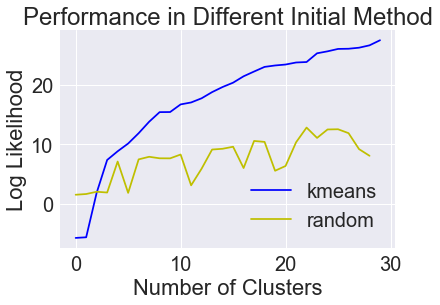

In [80]:
plt.plot(EM_init_method_score_low[:30],'b',label='kmeans')
plt.plot(EM_init_method_score_low[31:60],'y',label='random')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different Initial Method')

In [25]:
# EM_initial_point_score =[]
# EM_initial_point_score_low = []
# # n_init = [i for i in range(1,11)]
# for init in n_init:
#     EM = GaussianMixture(n_init=init,n_components=15,init_params='kmeans',random_state=3,covariance_type='full')
#     EM.fit(X_train)
#     EM_initial_point_score_low.append(EM.lower_bound_)
#     EM_initial_point_score.append(EM.score(X_test))

In [26]:
# plt.plot(EM_initial_point_score_low)
# plt.legend(loc="best")
# plt.xlabel('Number of Clusters')
# plt.ylabel('Log Likelihood')
# plt.title('Performance in Different Initial Method')

In [193]:
EM_initial_point_score =[]
EM_initial_point_score_low = []
for init in n_init:
    for comp in n_components: 
        EM = GaussianMixture(n_init=init,n_components=comp,init_params='kmeans',random_state=3,covariance_type='full')
        EM.fit(X_train)
        EM_initial_point_score_low.append(EM.lower_bound_)
        EM_initial_point_score.append(EM.score(X_test))

Text(0.5,1,'Performance in Different Initial Method')

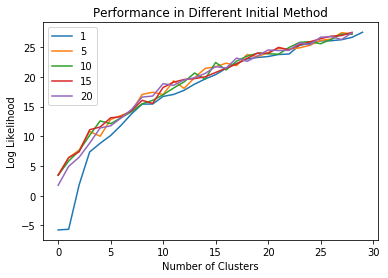

In [194]:
plt.plot(EM_initial_point_score_low[:30],label=1)
plt.plot(EM_initial_point_score_low[31:60],label=5)
plt.plot(EM_initial_point_score_low[61:90],label=10)
plt.plot(EM_initial_point_score_low[91:120],label=15)
plt.plot(EM_initial_point_score_low[121:150],label=20)
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different Initial Method')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

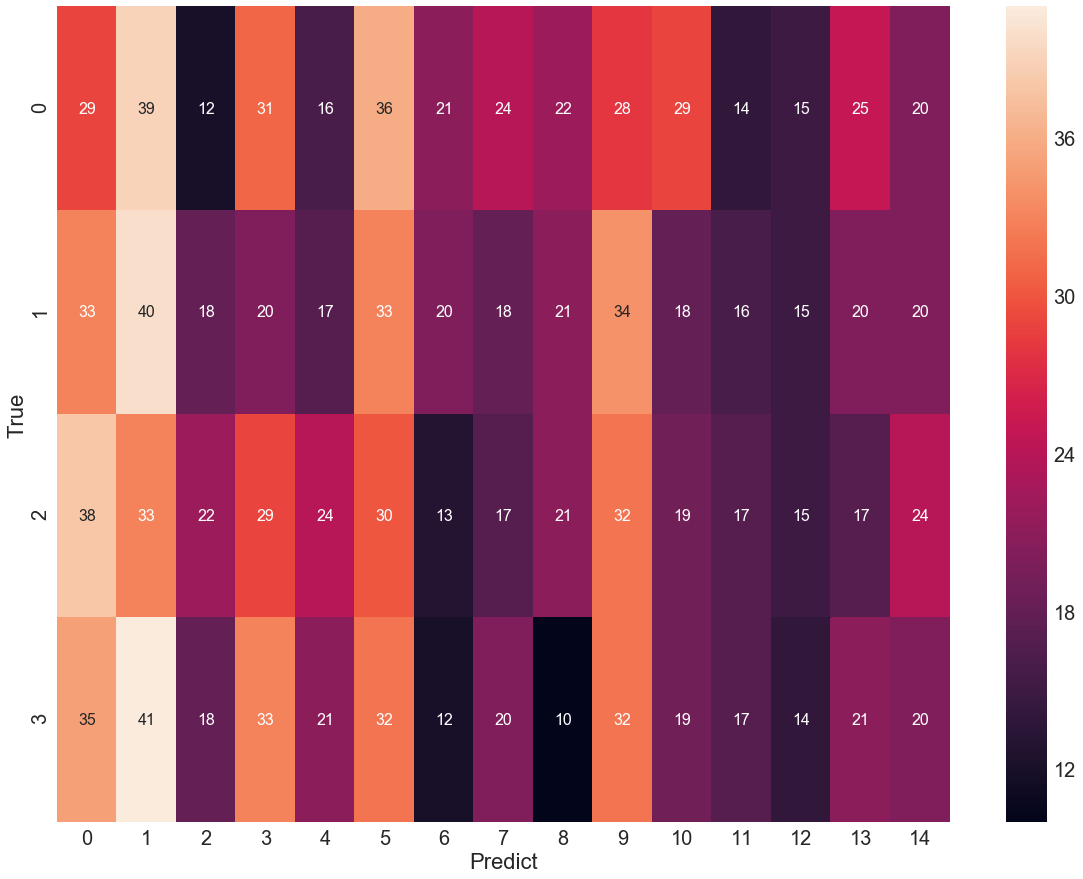

In [ ]:
EM = GaussianMixture(n_init=20,n_components=15,init_params='kmeans',random_state=3,covariance_type='full')
EM.fit(X_train)
K_label = EM.predict(X_train)
y_train_EM = pd.DataFrame(y_train)
y_train_EM['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_EM[y_train_EM['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:60]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

In [ ]:
K_label = EM.predict(X_test)
y_test_EM = pd.DataFrame(y_test)
y_test_EM['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_EM[y_test_EM['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:60]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

# PCA

In [83]:
n_components_pca = [i for i in range(1,21)]
whiten = [True,False]
svd_solver = ['auto','full','arpack','randomized']

Text(0.5,1,'PCA')

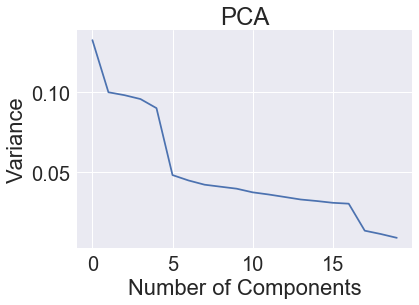

In [84]:
pca = PCA(n_components=20,random_state=3)
pca.fit(X_train)

pca_ncomp_score= pca.explained_variance_ratio_

plt.plot(pca_ncomp_score)
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('PCA')

Text(0.5,1,'PCA')

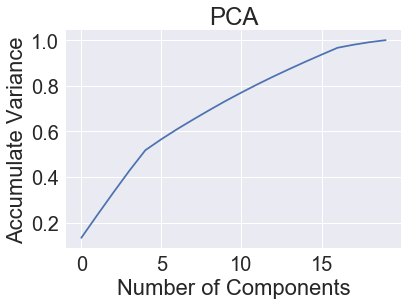

In [85]:
score_list=[]
for i, p in enumerate(pca_ncomp_score):
    if i==0:
        score_list.append(p)
    else:
        score_list.append(score_list[-1]+p)
plt.plot(score_list)
plt.xlabel('Number of Components')
plt.ylabel('Accumulate Variance')
plt.title('PCA')

In [86]:
pca = PCA(n_components=20,random_state=3,whiten=True)
pca.fit(X_train)
pca_whiten_t= pca.explained_variance_ratio_
pca = PCA(n_components=20,random_state=3,whiten=False)
pca.fit(X_train)
pca_whiten_f= pca.explained_variance_ratio_

Text(0.5,1,'PCA')

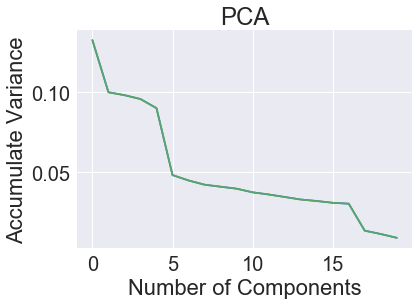

In [88]:
plt.plot(pca_whiten_t,label='whiten True')
plt.plot(pca_whiten_f,label='whiten False')
plt.xlabel('Number of Components')
plt.ylabel('Accumulate Variance')
plt.title('PCA')

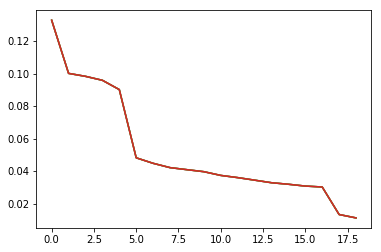

In [21]:
svd_solver = ['auto','full','arpack','randomized']
for s in svd_solver:
    pca = PCA(n_components=19,random_state=3,svd_solver=s)
    pca.fit(X_train)
    plt.plot(pca.explained_variance_ratio_)

In [195]:
clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.95

In [52]:
SVM_PCA = []
DT_PCA = []
for i in range(1,21):
    pca = PCA(n_components=i,random_state=3,whiten=True)
    pca.fit(X_train)
    pca_x_train = pca.transform(X_train)
    pca_x_test = pca.transform(X_test)
    clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
    clf.fit(pca_x_train,y_train)
    SVM_PCA.append(clf.score(pca_x_train,y_train))
    
    clf_DT =tree.DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=10,max_leaf_nodes=60)
    clf_DT.fit(pca_x_train,y_train)
    DT_PCA.append(clf.score(pca_x_test,y_test))

Text(0.5,1,'Performance in PCA')

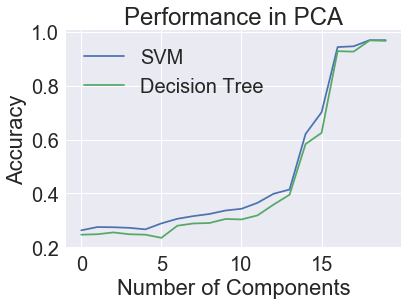

In [53]:
plt.plot(SVM_PCA,label='SVM')
plt.plot(DT_PCA,label='Decision Tree')
plt.legend(loc="best")
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Performance in PCA')

# CART

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8433333333333334

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

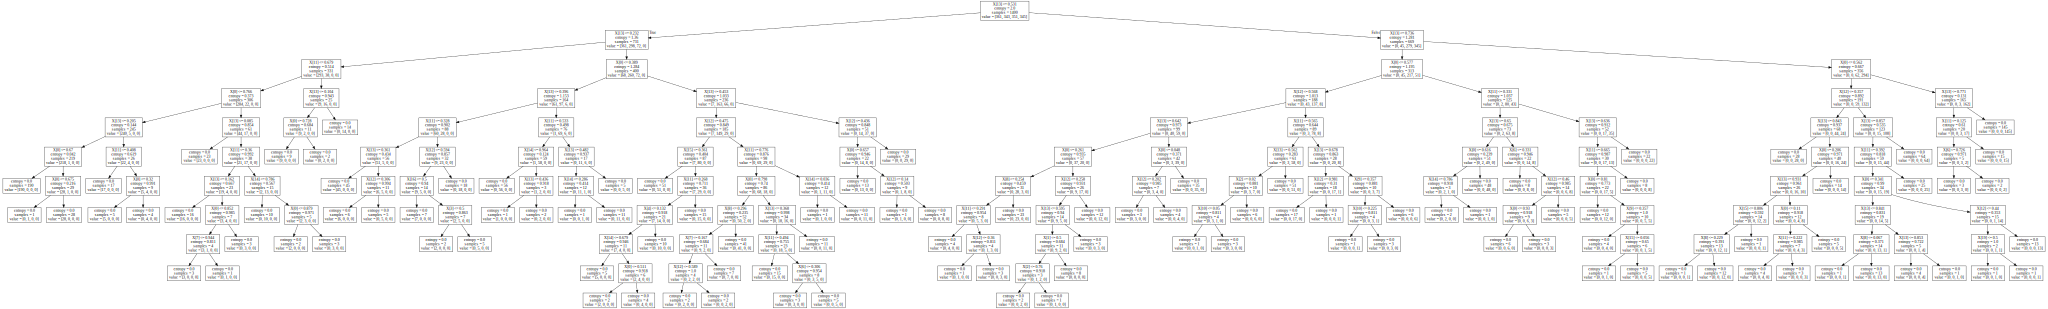

In [33]:
graph 

In [34]:
index = 0
feature_dict = {}
while index < len(dot_data)-1000:
    label_from = dot_data.find('label',index)
    label_till = dot_data.find(']',label_from)
    label = dot_data[label_from+7:label_till+1]
    index = label_till
    if label.startswith('X'):
        if label in feature_dict:
            feature_dict[label] +=1
        else:
            feature_dict[label] = 1

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=3)
selected_feature = ['battery_power','px_height','px_width','ram','sc_h']
clf.fit(X_train[selected_feature],y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [37]:
clf.score(X_test[selected_feature],y_test)

0.8466666666666667

In [38]:
clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.95

In [39]:
clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
clf.fit(X_train[selected_feature],y_train)
clf.score(X_test[selected_feature],y_test)

0.9583333333333334

c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
c:\users\craig\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


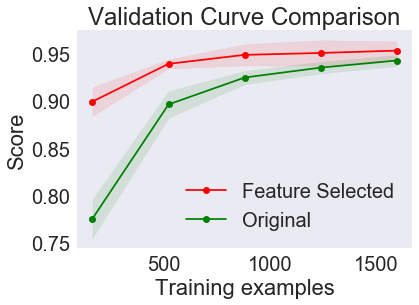

In [49]:
train_sizes = np.linspace(.1, 1.0, 5)
clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
train_sizes, train_scores_svm, test_scores_svm = learning_curve(clf, X[selected_feature], y, cv=5, n_jobs=1, train_sizes=train_sizes)

clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
train_sizes, train_scores_svm_original, test_scores_svm_original = learning_curve(clf, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)

plt.figure()
plt.title('Validation Curve Comparison')
#plt.ylim(0.85,.95)
plt.xlabel("Training examples")
plt.ylabel("Score")
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)
test_scores_std_svm = np.std(test_scores_svm, axis=1)

test_scores_mean_svm_original = np.mean(test_scores_svm_original, axis=1)
test_scores_std_svm_original = np.std(test_scores_svm_original, axis=1)
plt.grid()

plt.fill_between(train_sizes, test_scores_mean_svm - test_scores_std_svm,
                 test_scores_mean_svm + test_scores_std_svm, alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, test_scores_mean_svm_original - test_scores_std_svm_original,
                 test_scores_mean_svm_original + test_scores_std_svm_original, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean_svm, 'o-', color="r",
         label="Feature Selected")
plt.plot(train_sizes, test_scores_mean_svm_original, 'o-', color="g",
         label="Original")
plt.legend(loc="best")

# ICA

In [54]:
SVM_ICA = []
DT_ICA = []
for i in range(1,21):
    ica = FastICA(n_components=i,random_state=3)
    ica.fit(X_train)
    ica_X_train = ica.transform(X_train)
    ica_X_test = ica.transform(X_test)
    clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
    clf.fit(ica_X_train,y_train)
    SVM_ICA.append(clf.score(ica_X_test,y_test))
    
    clf_DT =tree.DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=10,max_leaf_nodes=60)
    clf_DT.fit(ica_X_train,y_train)
    DT_ICA.append(clf.score(ica_X_test,y_test))

Text(0.5,1,'Performance in ICA')

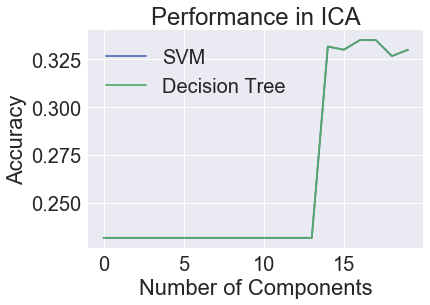

In [59]:
plt.plot(SVM_ICA,label='SVM')
plt.plot(DT_ICA,label='Decision Tree')
plt.legend(loc="best")
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Performance in ICA')

# Random Projection

In [62]:
SVM_RP = []
DT_RP = []
for i in range(1,21):
    rp_G = GaussianRandomProjection(random_state=3,n_components=i)
    rp_G.fit(X_train)
    rp_G_X_train = rp_G.transform(X_train)
    rp_G_X_test = rp_G.transform(X_test)
    clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
    clf.fit(rp_G_X_train,y_train)
    SVM_RP.append(clf.score(rp_G_X_test,y_test))
    
    clf_DT =tree.DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=10,max_leaf_nodes=60)
    clf_DT.fit(rp_G_X_train,y_train)
    DT_RP.append(clf.score(rp_G_X_test,y_test))

Text(0.5,1,'Performance in RP')

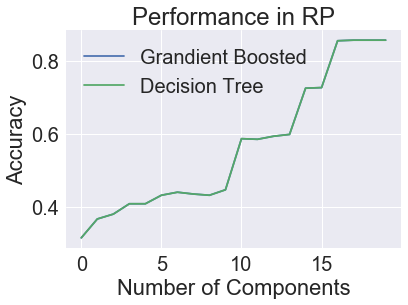

In [63]:
plt.plot(SVM_RP,label='Grandient Boosted')
plt.plot(DT_RP,label='Decision Tree')
plt.legend(loc="best")
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Performance in RP')

# Feature Selection

Text(0.5,1,'Performance in Different K')

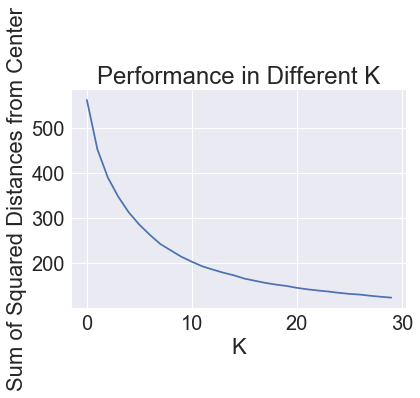

In [89]:
k_tol_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
    Kmean.fit(X_train[selected_feature])
    k_tol_score.append(Kmean.inertia_)
plt.plot(k_tol_score)
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

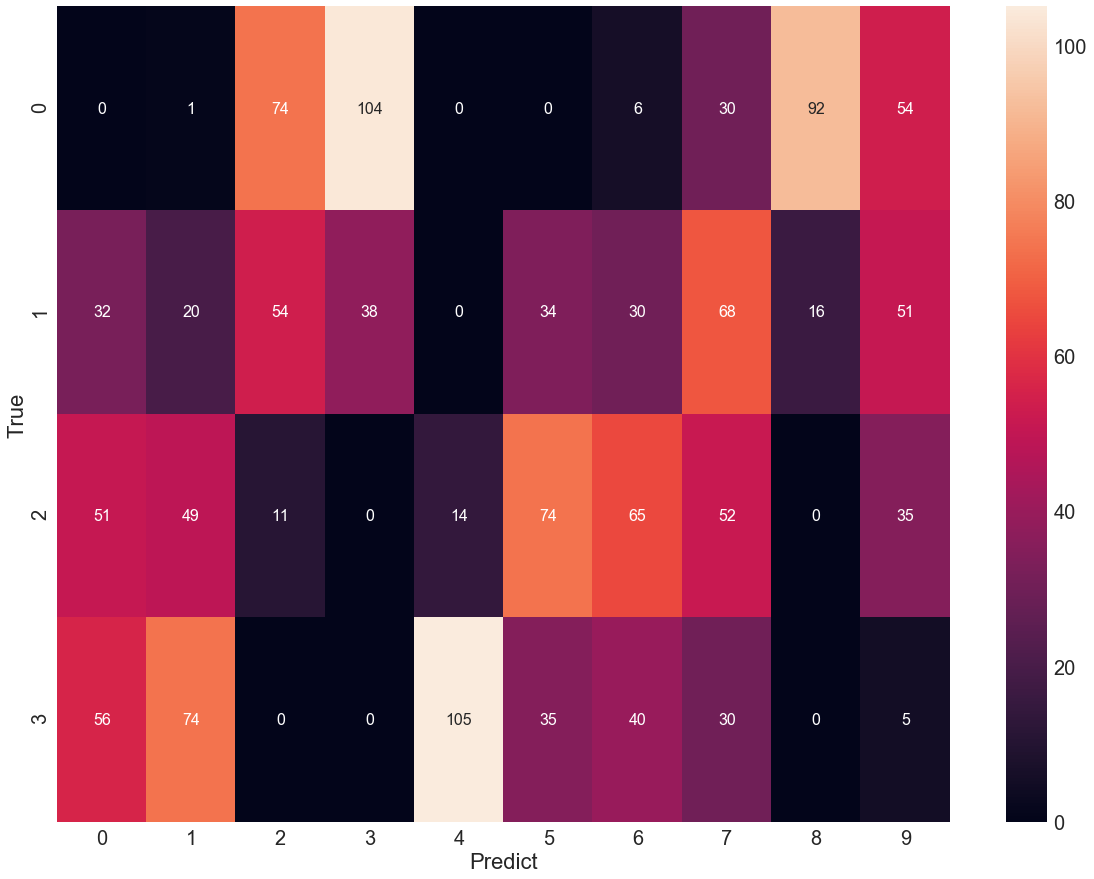

In [90]:
Kmean = KMeans(n_clusters=10,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
Kmean.fit(X_train[selected_feature])
K_label = Kmean.labels_
y_train_kmean_f = pd.DataFrame(y_train)
y_train_kmean_f['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(10)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_kmean_f[y_train_kmean_f['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:10],list_[10:20],list_[20:30],list_[30:40]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

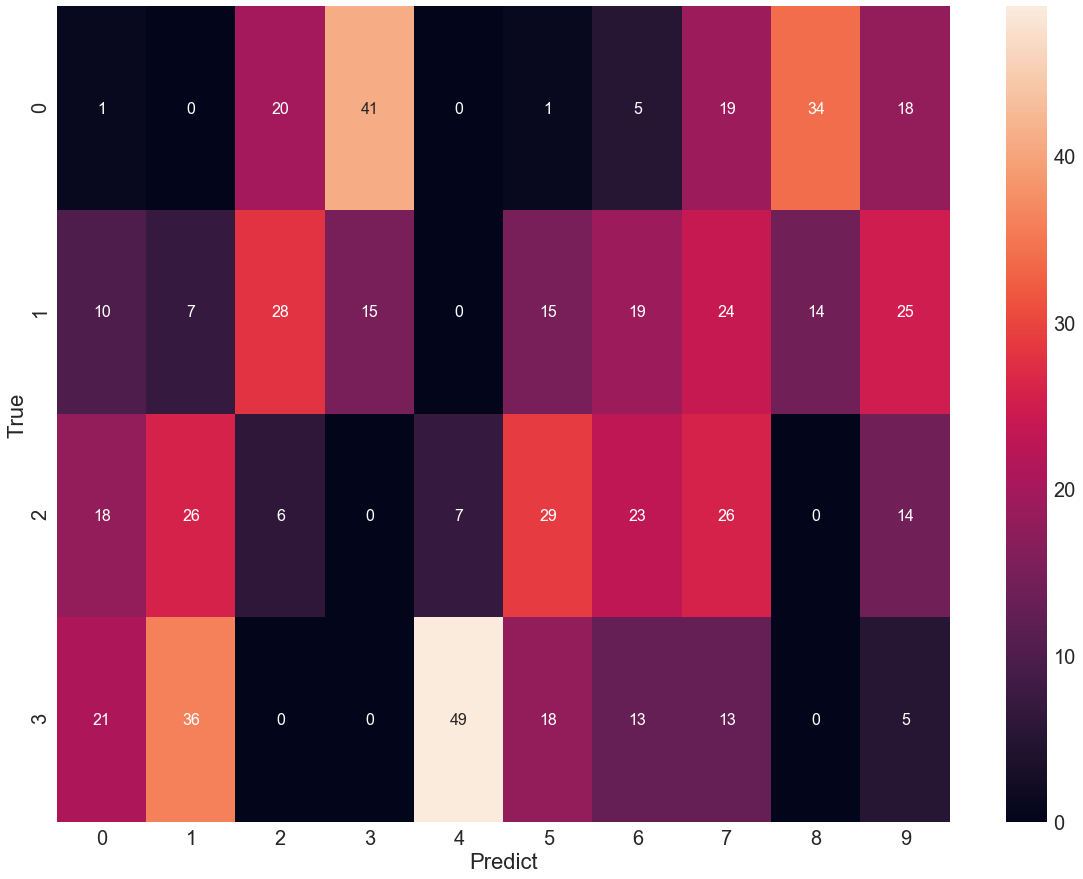

In [91]:
K_label = Kmean.predict(X_test[selected_feature])
y_test_kmean_f = pd.DataFrame(y_test)
y_test_kmean_f['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(10)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_kmean_f[y_test_kmean_f['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:10],list_[10:20],list_[20:30],list_[30:40]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

In [65]:
# Kmean = KMeans(n_clusters=4,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
# Kmean.fit(X[selected_feature])
# K_label = Kmean.labels_
# y = pd.DataFrame(y)
# y['predict'] = K_label
# price_range_list = [0,1,2,3]
# predict_range_list = [i for i in range(4)]
# list_ = []
# for pr in price_range_list:
#     for pred in predict_range_list:
#         list_.append((y[y['price_range']==pr]['predict'] == pred).sum())
# data = np.array([list_[:4],list_[4:8],list_[8:12],list_[12:16]])
# DF = pd.DataFrame(data)

# sn.set(font_scale=2)#for label size
# ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
# ax.set(xlabel='Predict', ylabel='True')

Text(0.5,1,'Performance in Different K')

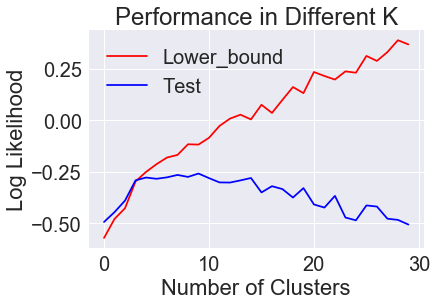

In [92]:
EM_comp_score_low = []
EM_comp_score =[]
for comp in n_components:
    EM = GaussianMixture(n_components=comp,init_params='kmeans',random_state=3)
    EM.fit(X_train[selected_feature])
    EM_comp_score_low.append(EM.lower_bound_)
    EM_comp_score.append(EM.score(X_test[selected_feature]))

plt.plot(EM_comp_score_low,'r',label='Lower_bound')
plt.plot(EM_comp_score,'b',label='Test')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different K')

[Text(24,0.5,'True'), Text(0.5,6,'Predict')]

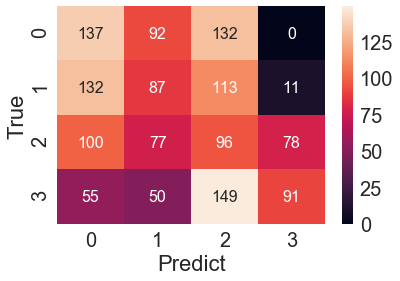

In [73]:
EM = GaussianMixture(n_init=30,n_components=4,init_params='kmeans',random_state=3,covariance_type='full')
EM.fit(X_train[selected_feature])
K_label = EM.predict(X_train[selected_feature])
y_train_EM_f = pd.DataFrame(y_train)
y_train_EM_f['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(4)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_EM_f[y_train_EM_f['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:4],list_[4:8],list_[8:12],list_[12:16]])
DF = pd.DataFrame(data)


sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(24,0.5,'True'), Text(0.5,6,'Predict')]

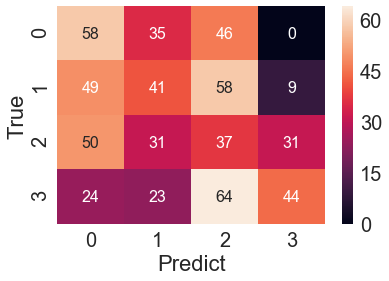

In [75]:
K_label = EM.predict(X_test[selected_feature])
y_test_EM_f = pd.DataFrame(y_test)
y_test_EM_f['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(4)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_EM_f[y_test_EM_f['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:4],list_[4:8],list_[8:12],list_[12:16]])
DF = pd.DataFrame(data)


sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

# PCA

In [97]:
pca = PCA(n_components=17,random_state=3)
pca.fit(X)
pca_X_train = pca.transform(X_train)

Text(0.5,1,'Performance in Different K')

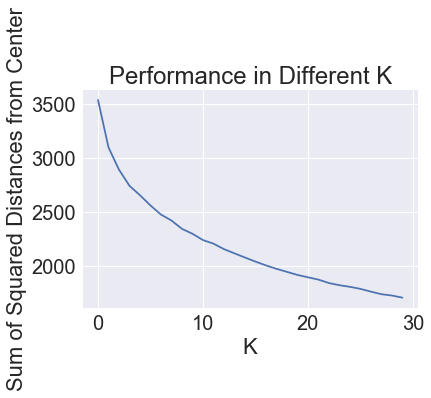

In [98]:
k_tol_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
    Kmean.fit(pca_X_train)
    k_tol_score.append(Kmean.inertia_)
plt.plot(k_tol_score)
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

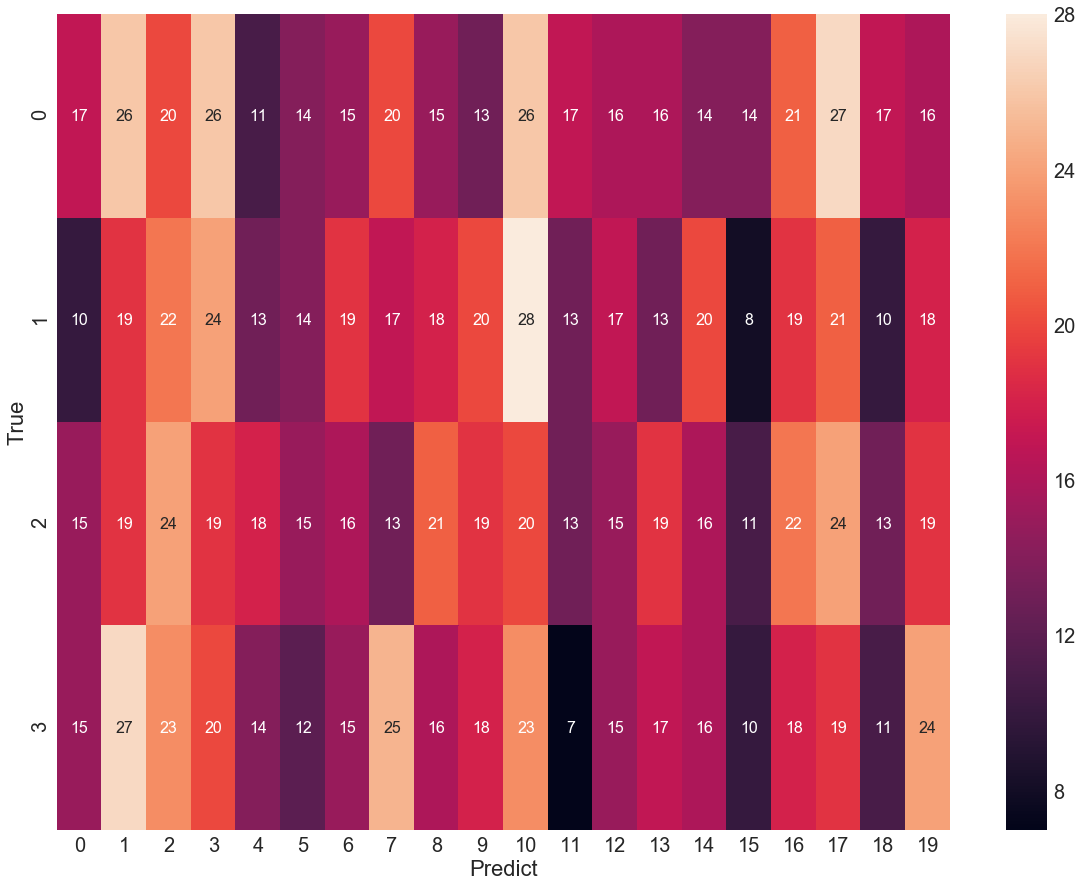

In [99]:
Kmean = KMeans(n_clusters=20,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
Kmean.fit(pca_X_train)
K_label = Kmean.labels_
y_train_kmean_pca = pd.DataFrame(y_train)
y_train_kmean_pca['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(20)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_kmean_pca[y_train_kmean_pca['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:20],list_[20:40],list_[40:60],list_[60:80]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

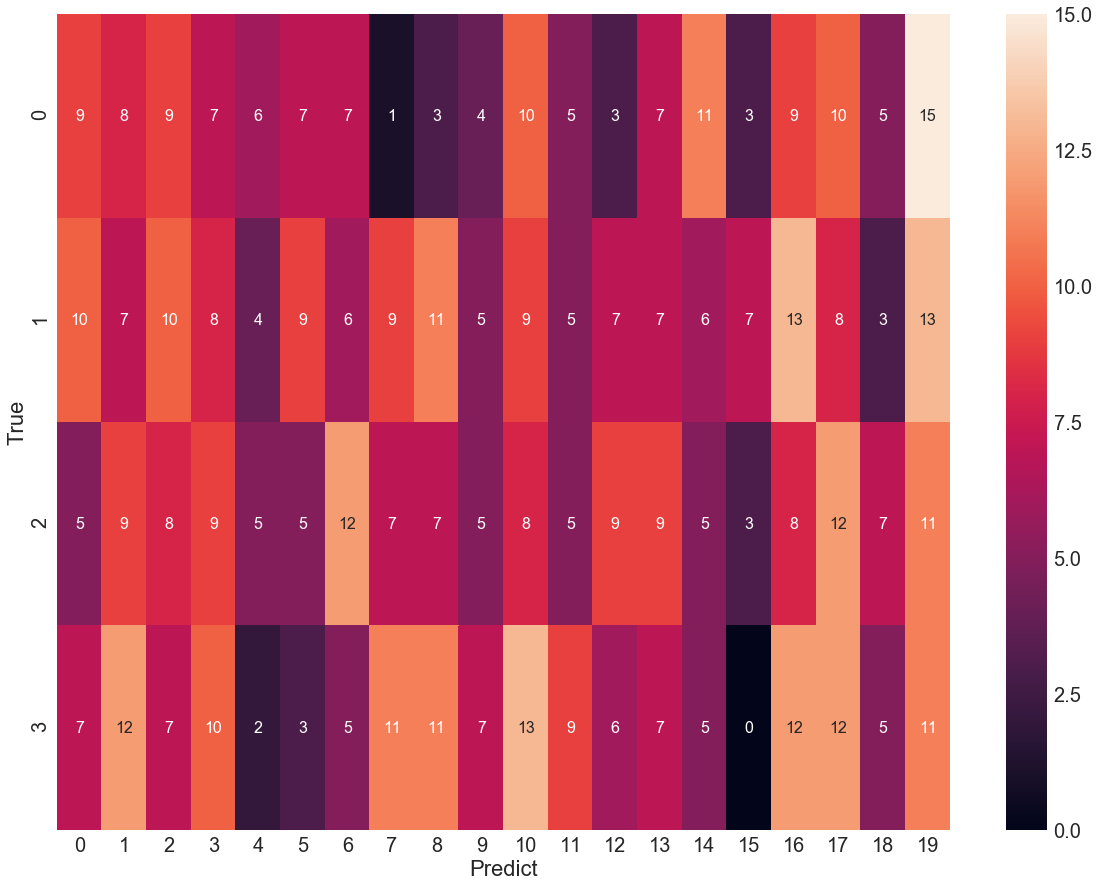

In [100]:
pca_X_test = pca.transform(X_test)
K_label = Kmean.predict(pca_X_test)
y_test_kmean_pca = pd.DataFrame(y_test)
y_test_kmean_pca['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(20)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_kmean_pca[y_test_kmean_pca['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:20],list_[20:40],list_[40:60],list_[60:80]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

Text(0.5,1,'Performance in Different K')

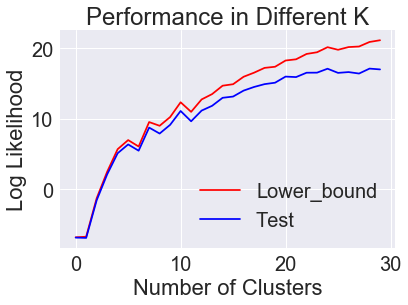

In [101]:
EM_comp_score_low = []
EM_comp_score =[]
for comp in n_components:
    EM = GaussianMixture(n_components=comp,init_params='kmeans',random_state=3)
    EM.fit(pca_X_train)
    EM_comp_score_low.append(EM.lower_bound_)
    EM_comp_score.append(EM.score(pca_X_test))

plt.plot(EM_comp_score_low,'r',label='Lower_bound')
plt.plot(EM_comp_score,'b',label='Test')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

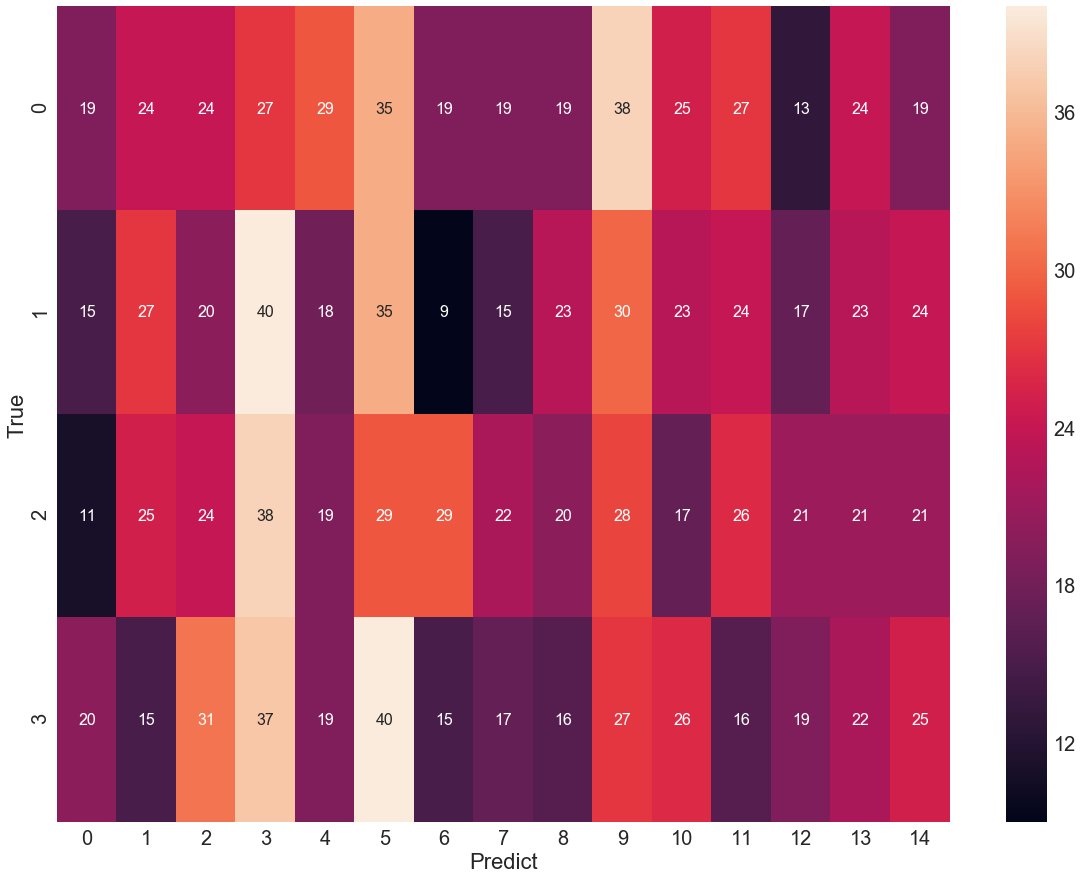

In [102]:
EM = GaussianMixture(n_init=30,n_components=15,init_params='kmeans',random_state=3,covariance_type='full')
EM.fit(pca_X_train)
K_label = EM.predict(pca_X_train)
y_train_EM_pca = pd.DataFrame(y_train)
y_train_EM_pca['predict'] = K_label
y['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_EM_pca[y_train_EM_pca['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:60]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

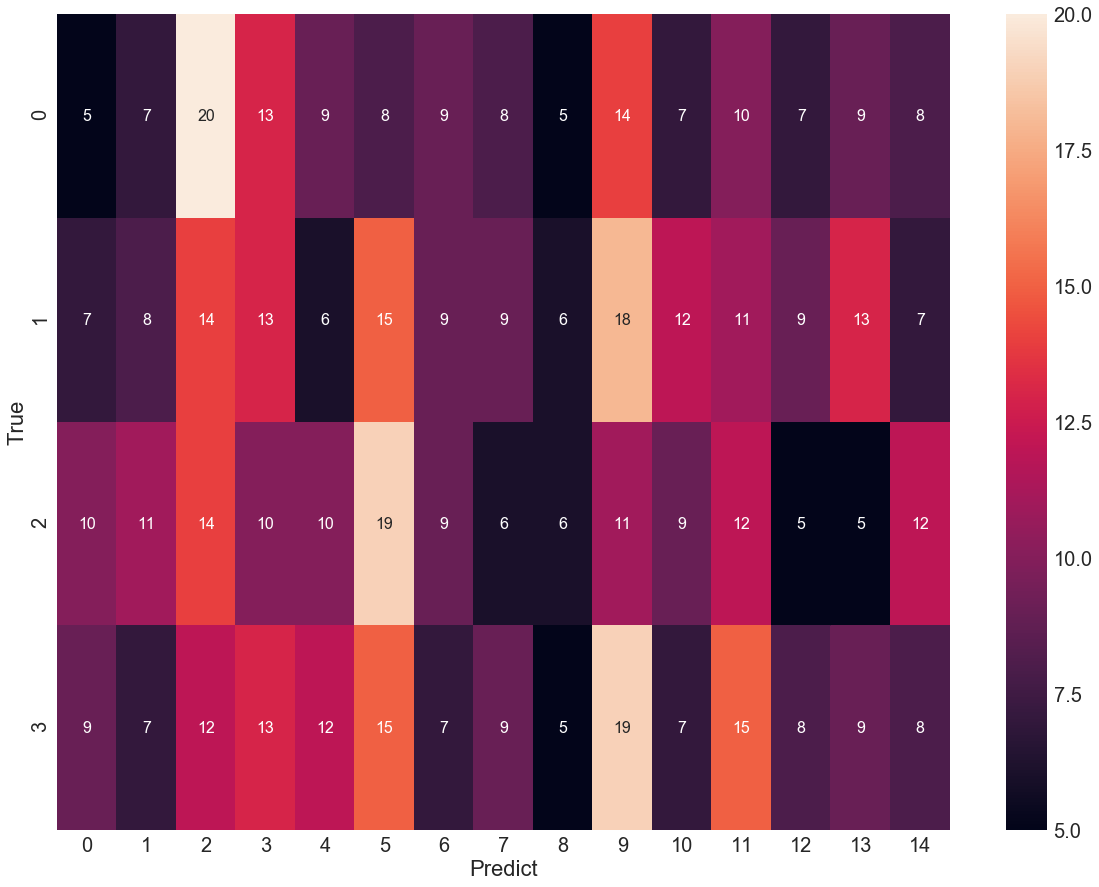

In [103]:
K_label = EM.predict(pca_X_test)
y_test_EM_pca = pd.DataFrame(y_test)
y_test_EM_pca['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_EM_pca[y_test_EM_pca['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:60]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

# ICA

In [104]:
ica = FastICA(n_components=15,random_state=3)
ica.fit(X_train)
ica_X_train = ica.transform(X_train)

Text(0.5,1,'Performance in Different K')

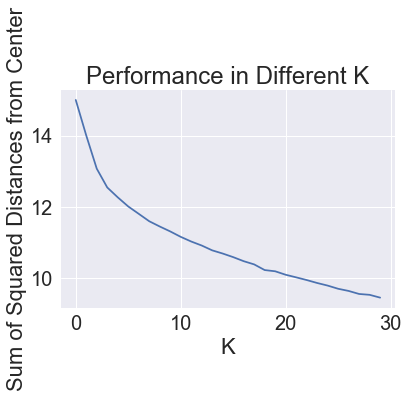

In [105]:
k_tol_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
    Kmean.fit(ica_X_train)
    k_tol_score.append(Kmean.inertia_)
plt.plot(k_tol_score)
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

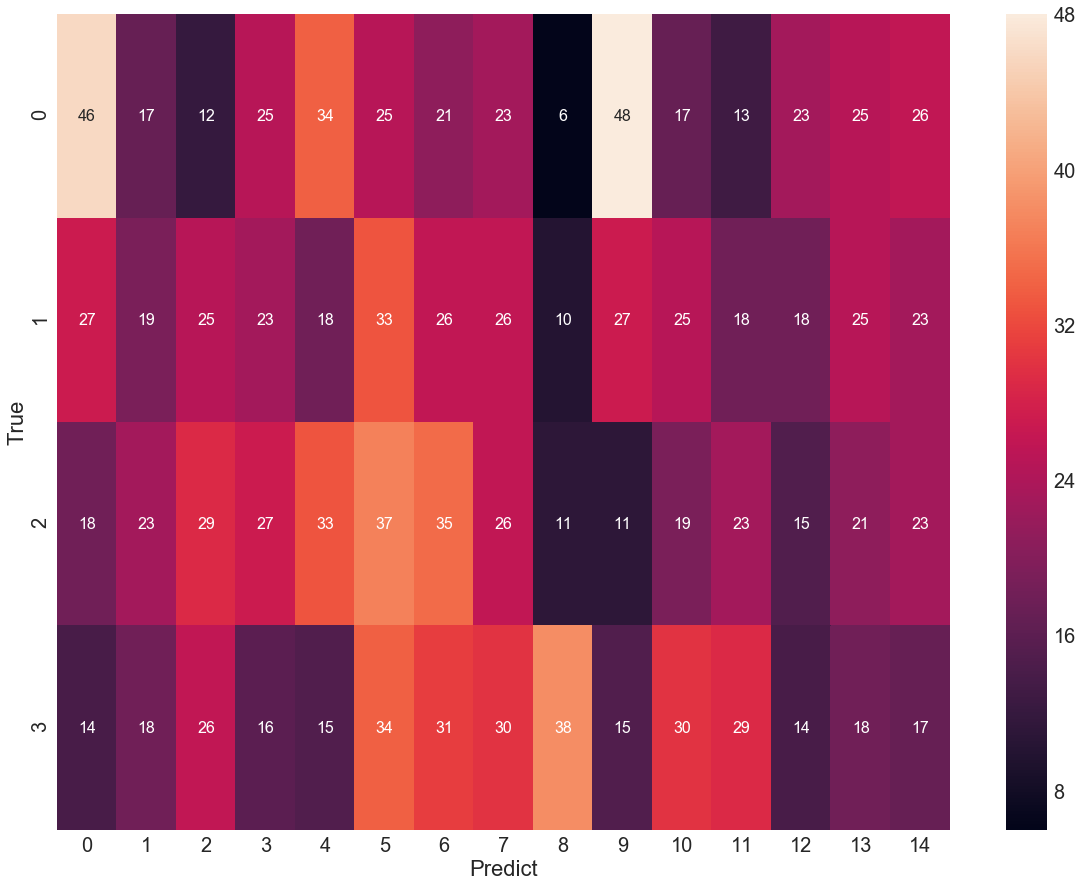

In [106]:
Kmean = KMeans(n_clusters=15,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
Kmean.fit(ica_X_train)
K_label = Kmean.labels_
y_train_kmean_ica = pd.DataFrame(y_train)
y_train_kmean_ica['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_kmean_ica[y_train_kmean_ica['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

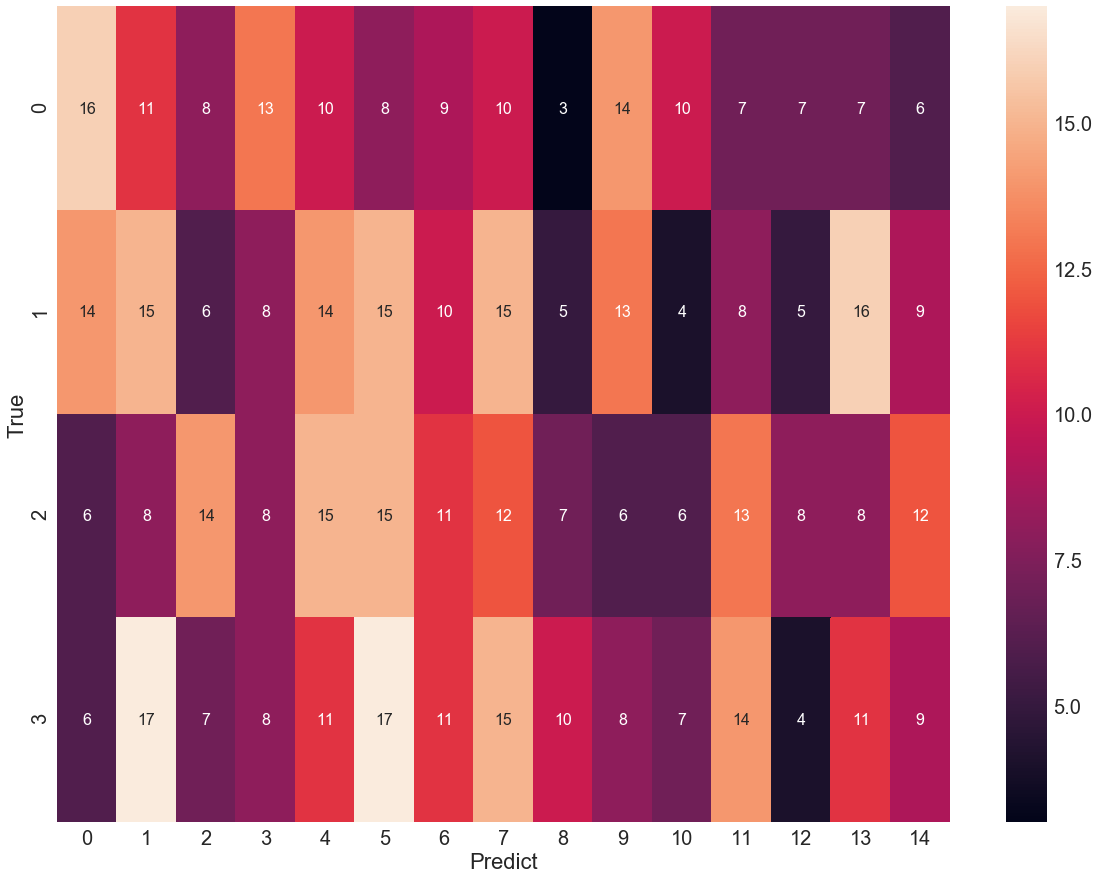

In [107]:
ica_X_test = ica.transform(X_test)
K_label = Kmean.predict(ica_X_test)
y_test_kmean_ica = pd.DataFrame(y_test)
y_test_kmean_ica['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(15)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_kmean_ica[y_test_kmean_ica['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:15],list_[15:30],list_[30:45],list_[45:]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

Text(0.5,1,'Performance in Different K')

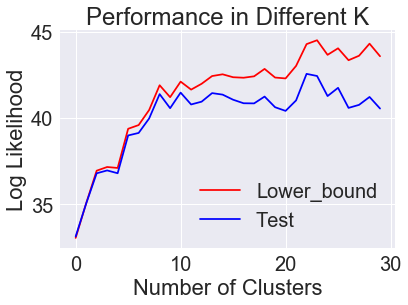

In [108]:
EM_comp_score_low = []
EM_comp_score =[]
for comp in n_components:
    EM = GaussianMixture(n_components=comp,init_params='kmeans',random_state=3)
    EM.fit(ica_X_train)
    EM_comp_score_low.append(EM.lower_bound_)
    EM_comp_score.append(EM.score(ica_X_test))

plt.plot(EM_comp_score_low,'r',label='Lower_bound')
plt.plot(EM_comp_score,'b',label='Test')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

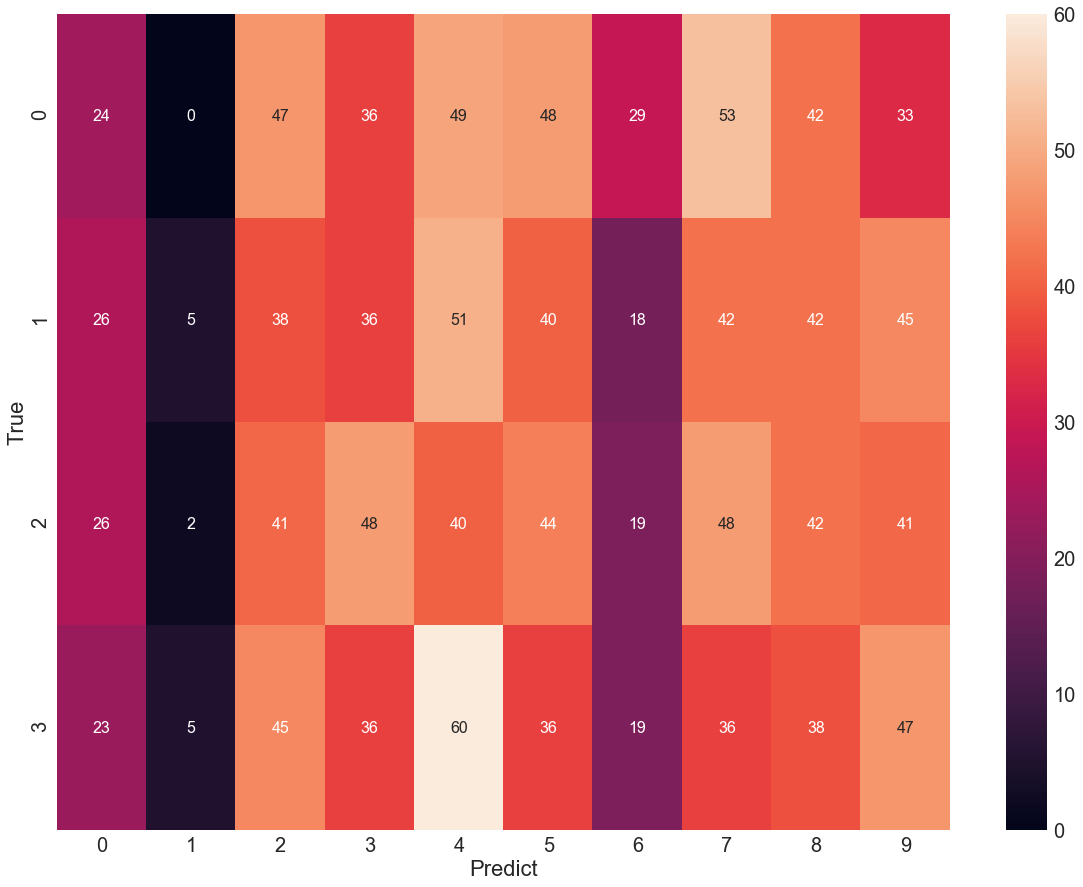

In [109]:
EM = GaussianMixture(n_init=30,n_components=10,init_params='kmeans',random_state=3,covariance_type='full')
EM.fit(ica_X_train)
K_label = EM.predict(ica_X_train)
y_train_EM_ica = pd.DataFrame(y_train)
y_train_EM_ica['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(10)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_EM_ica[y_train_EM_ica['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:10],list_[10:20],list_[20:30],list_[30:40]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

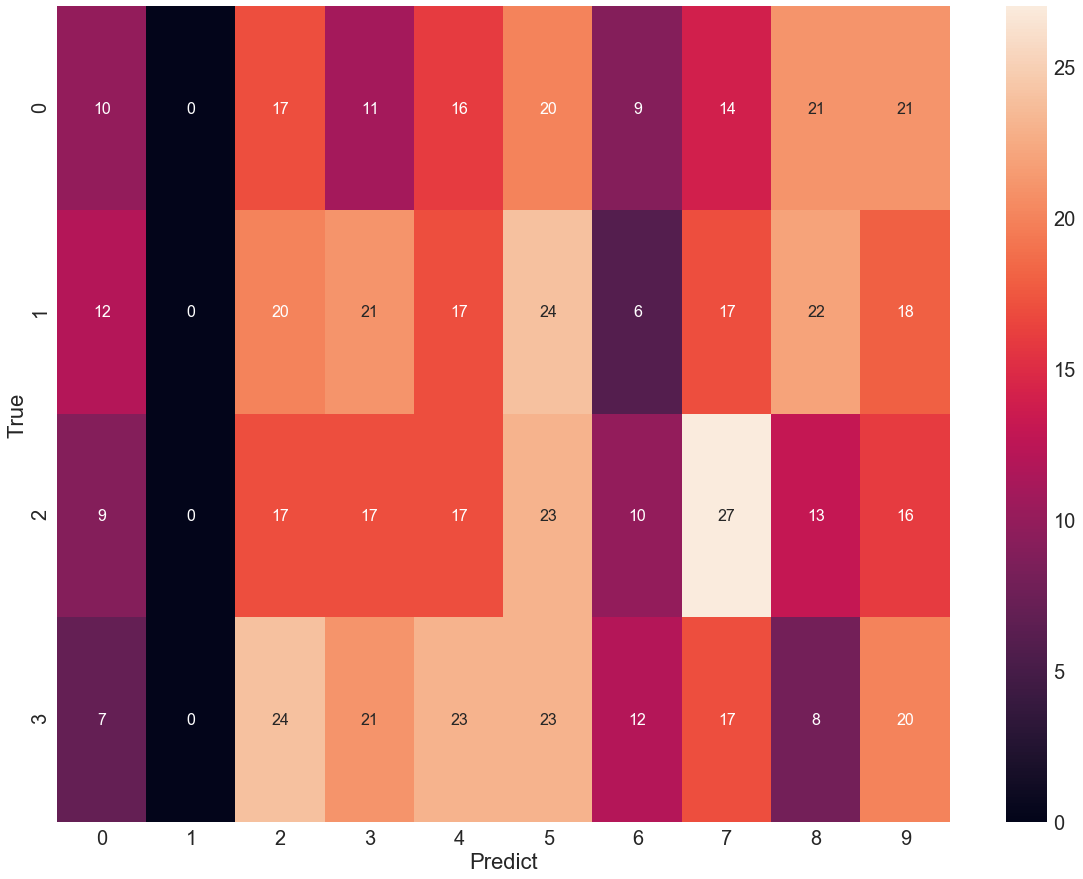

In [110]:
K_label = EM.predict(ica_X_test)
y_test_EM_ica = pd.DataFrame(y_test)
y_test_EM_ica['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(10)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_EM_ica[y_test_EM_ica['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:10],list_[10:20],list_[20:30],list_[30:40]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

# RNADOM PROJECTION

In [111]:
rp_G = GaussianRandomProjection(random_state=3,n_components=16)
rp_G.fit(X_train)
rp_X_train = rp_G.transform(X_train)

Text(0.5,1,'Performance in Different K')

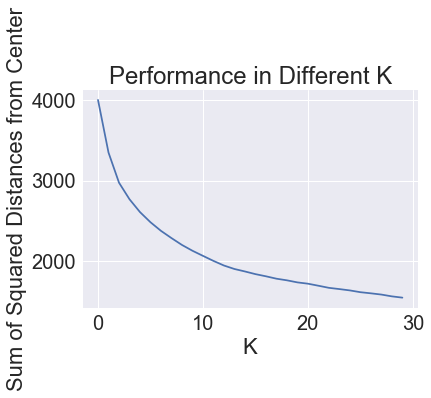

In [112]:
k_tol_score = []
for i in range(1,31):
    Kmean = KMeans(n_clusters=i,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
    Kmean.fit(rp_X_train)
    k_tol_score.append(Kmean.inertia_)
plt.plot(k_tol_score)
plt.legend(loc="best")
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances from Center')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

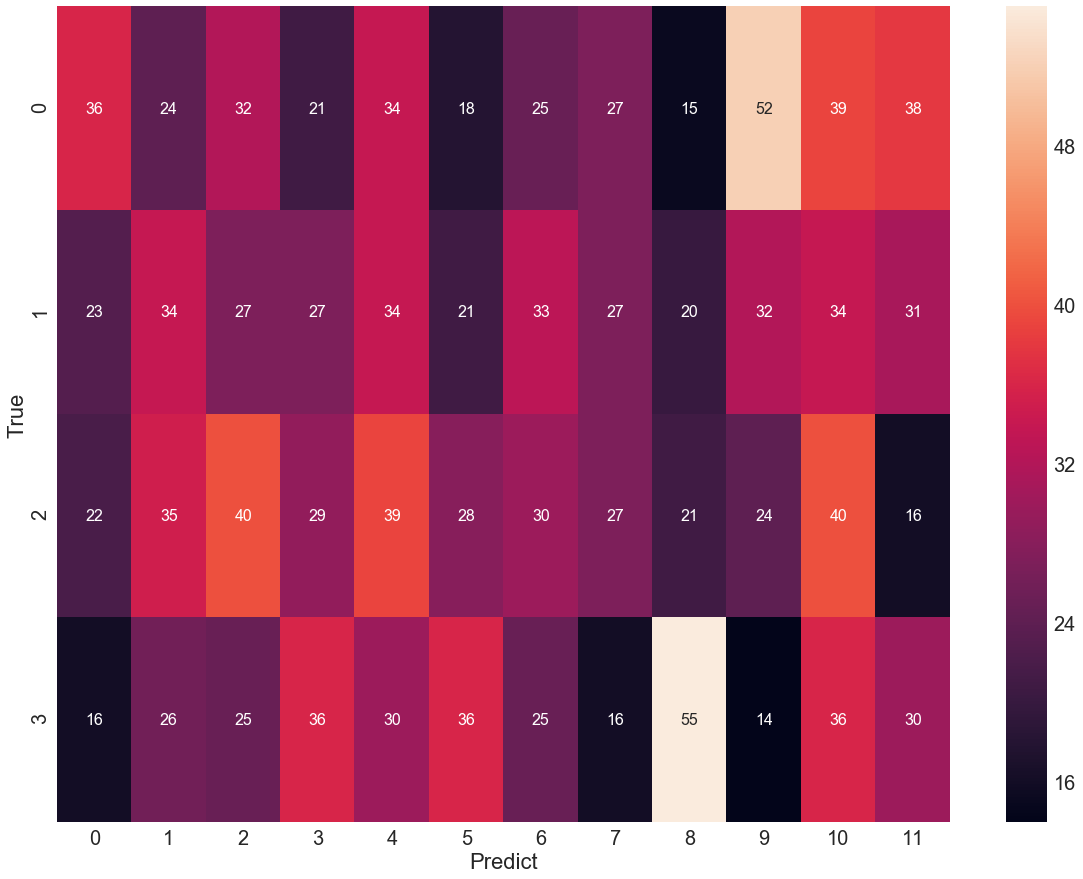

In [113]:
Kmean = KMeans(n_clusters=12,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
Kmean.fit(rp_X_train)
K_label = Kmean.labels_
y_train_kmean_rp = pd.DataFrame(y_train)
y_train_kmean_rp['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(12)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_kmean_rp[y_train_kmean_rp['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:12],list_[12:24],list_[24:36],list_[36:48]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

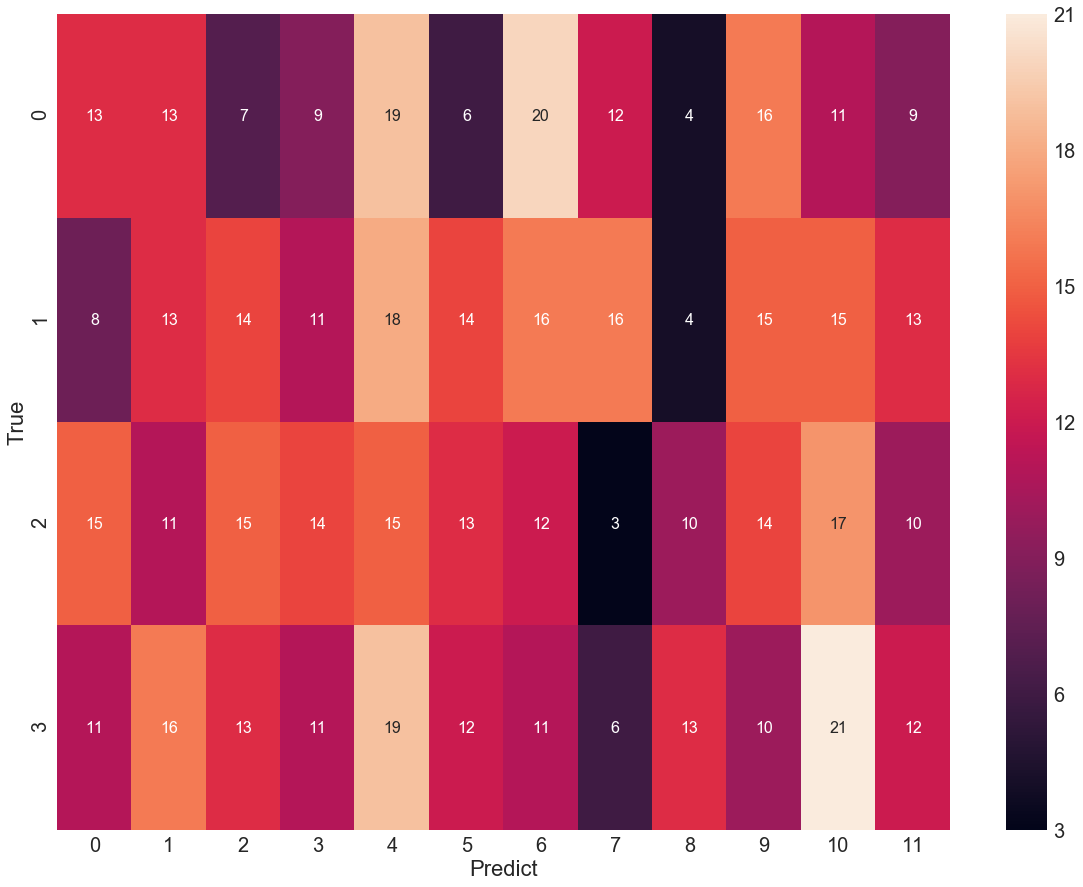

In [114]:
rp_X_test = rp_G.transform(X_test)
K_label = Kmean.predict(rp_X_test)
y_test_kmean_rp = pd.DataFrame(y_test)
y_test_kmean_rp['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(12)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_test_kmean_rp[y_test_kmean_rp['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:12],list_[12:24],list_[24:36],list_[36:48]])
DF = pd.DataFrame(data)
plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

Text(0.5,1,'Performance in Different K')

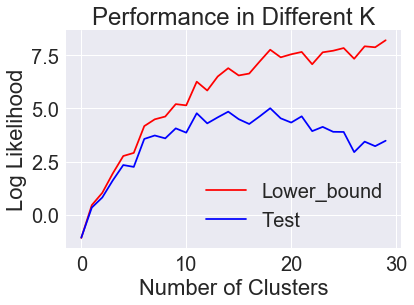

In [116]:
EM_comp_score_low = []
EM_comp_score =[]
for comp in n_components:
    EM = GaussianMixture(n_components=comp,init_params='kmeans',random_state=3)
    EM.fit(rp_X_train)
    EM_comp_score_low.append(EM.lower_bound_)
    EM_comp_score.append(EM.score(rp_X_test))

plt.plot(EM_comp_score_low,'r',label='Lower_bound')
plt.plot(EM_comp_score,'b',label='Test')
plt.legend(loc="best")
plt.xlabel('Number of Clusters')
plt.ylabel('Log Likelihood')
plt.title('Performance in Different K')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

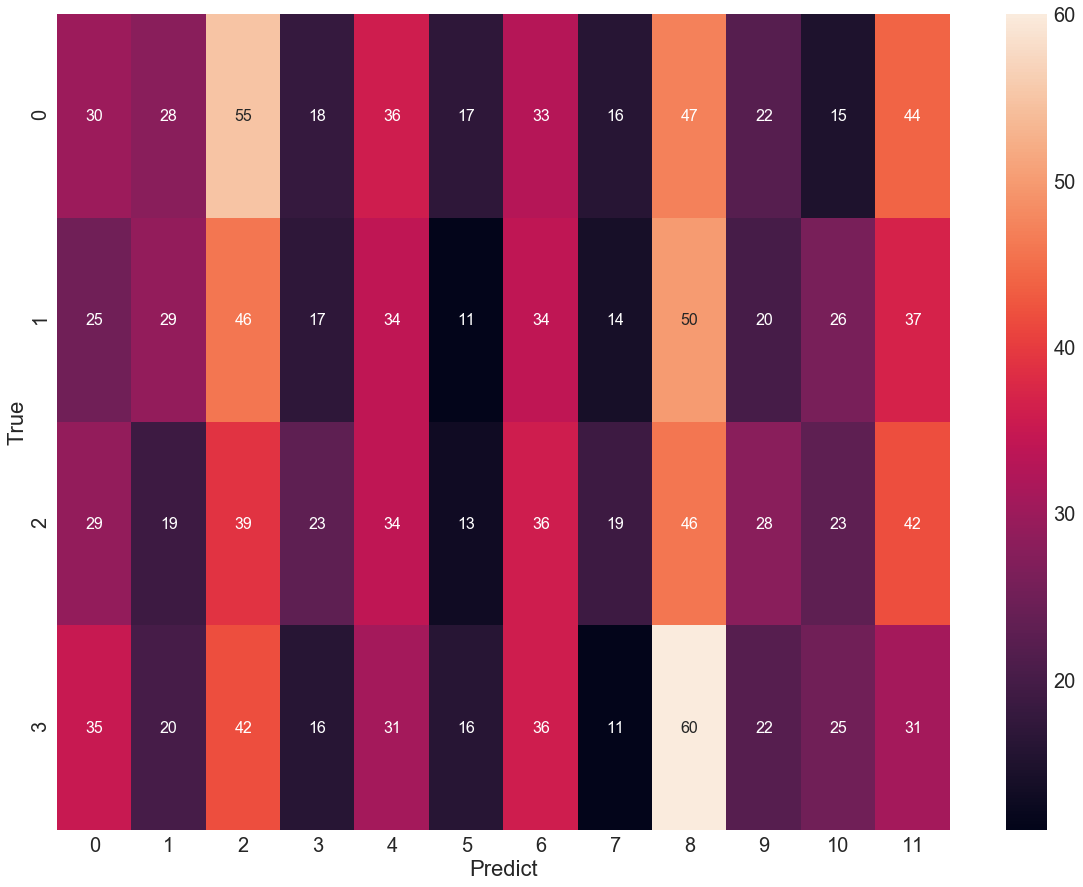

In [117]:
EM = GaussianMixture(n_init=30,n_components=12,init_params='kmeans',random_state=3,covariance_type='full')
EM.fit(rp_X_train)
K_label = EM.predict(rp_X_train)
y_train_EM_rp = pd.DataFrame(y_train)
y_train_EM_rp['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(12)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_EM_rp[y_train_EM_rp['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:12],list_[12:24],list_[24:36],list_[36:48]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

[Text(150,0.5,'True'), Text(0.5,105,'Predict')]

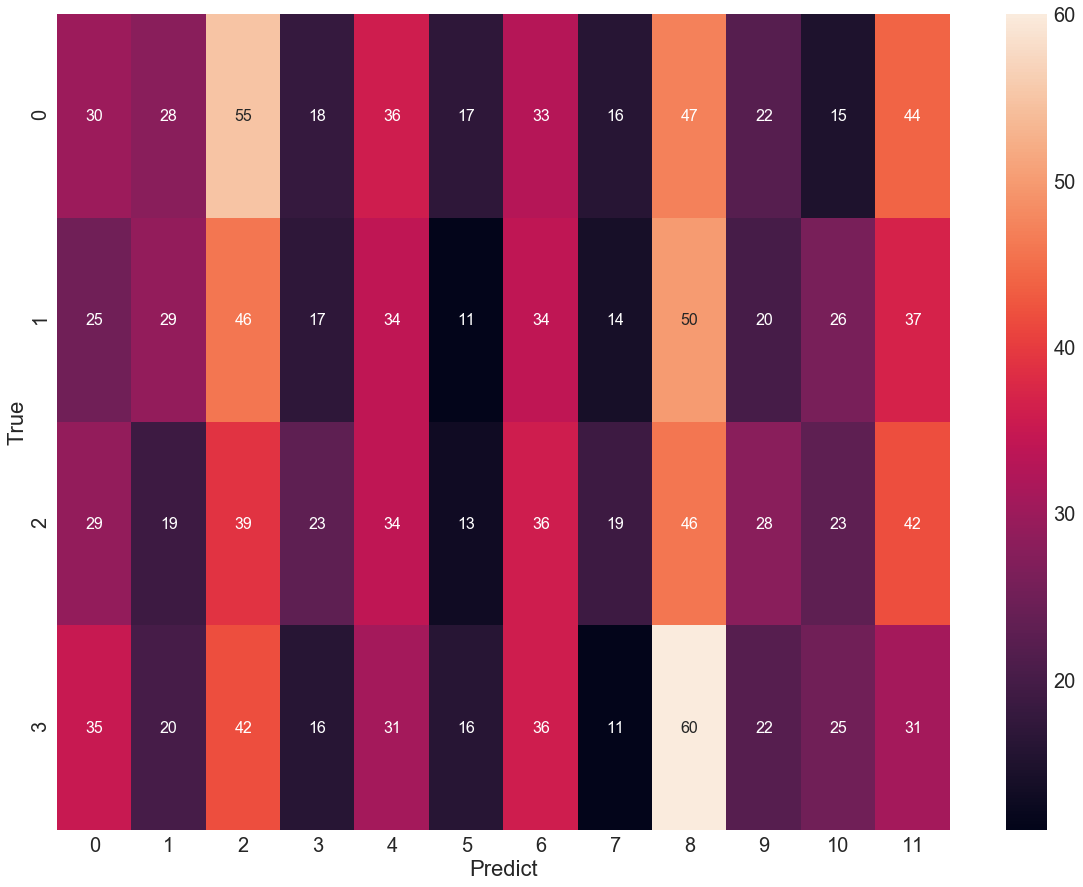

In [118]:
K_label = EM.predict(rp_X_test)
y_test_EM_rp = pd.DataFrame(y_test)
y_test_EM_rp['predict'] = K_label
price_range_list = [0,1,2,3]
predict_range_list = [i for i in range(12)]
list_ = []
for pr in price_range_list:
    for pred in predict_range_list:
        list_.append((y_train_EM_rp[y_train_EM_rp['price_range']==pr]['predict'] == pred).sum())
data = np.array([list_[:12],list_[12:24],list_[24:36],list_[36:48]])
DF = pd.DataFrame(data)

plt.figure(figsize=(20,15))
sn.set(font_scale=2)#for label size
ax = sn.heatmap(DF, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')

In [6]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
encode.fit([[0],[1],[2],[3]])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [7]:
def one_hot_0(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][0]

def one_hot_1(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][1]

def one_hot_2(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][2]

def one_hot_3(x):
    re = encode.transform([[x]]).toarray()
    re.astype(int)
    return re[0][3]

In [8]:
Y_train_nn = pd.DataFrame(y_train)
Y_test_nn = pd.DataFrame(y_test)

In [9]:
Y_train_nn['price_range0'] = Y_train_nn['price_range'].apply(one_hot_0)
Y_train_nn['price_range1'] = Y_train_nn['price_range'].apply(one_hot_1)
Y_train_nn['price_range2'] = Y_train_nn['price_range'].apply(one_hot_2)
Y_train_nn['price_range3'] = Y_train_nn['price_range'].apply(one_hot_3)
Y_test_nn['price_range0'] = Y_test_nn['price_range'].apply(one_hot_0)
Y_test_nn['price_range1'] = Y_test_nn['price_range'].apply(one_hot_1)
Y_test_nn['price_range2'] = Y_test_nn['price_range'].apply(one_hot_2)
Y_test_nn['price_range3'] = Y_test_nn['price_range'].apply(one_hot_3)

In [10]:
selected_feature = ['battery_power','px_height','px_width','ram','sc_h']
X_train_nn = np.array(X_train[selected_feature])
X_test_nn = np.array(X_test[selected_feature])
y_train_nn = np.array(Y_train_nn[Y_train_nn.columns[1:5]])
y_test_nn = np.array(Y_test_nn[Y_test_nn.columns[1:5]])

In [11]:
node = 20
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x_ph = tf.placeholder('float', [None,5])
y_ph = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model_selection(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([5,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [12]:
accuracy_list=[]
def train_nn_selection(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(X_train[selected_feature].shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = X_train_nn[beg:end]
                ep_y = y_train_nn[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x_ph:X_test_nn, y_ph:y_test_nn})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [13]:
def train_nn_w_lr(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for j in range(1,6):
            for ep in range(epoch):
                epoch_loss = 0
                for i in range(int(X_train.shape[0]/5/batch_size*j)):
                    beg = i*batch_size
                    end = beg + batch_size
                    ep_x = X_train_nn[beg:end]
                    ep_y = y_train_nn[beg:end]
    #                 DF                
    #                 ep_x = X_train[beg:end]
    #                 ep_y = y_train[y_train.columns[1:5]][beg:end]

    #                 x = X_train[beg:end]
    #                 y = y_train[beg:end]                
    #                 UnboundLocalError: local variable 'y' referenced before assignment

                    qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
    #                 ValueError: setting an array element with a sequence.
    #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                    epoch_loss += c
                #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
            correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            Acc = accuracy.eval({x_ph:X_train_nn, y_ph:y_train_nn})
            train_list.append(Acc)
            Acc = accuracy.eval({x_ph:X_test_nn, y_ph:y_test_nn})
            accuracy_list.append(Acc)
            print('Acc:',Acc)

In [14]:
accuracy_list=[]
train_list = []
train_nn_w_lr(x_ph,nn_model_selection)
acc_lr_test_selection = accuracy_list
acc_lr_train_selection = train_list

Acc: 0.93
Acc: 0.96666664
Acc: 0.97
Acc: 0.955
Acc: 0.95


# PCA

In [32]:
pca = PCA(n_components=17,random_state=3)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
X_train_nn = np.array(pca_X_train)
X_test_nn = np.array(pca_X_test)

In [33]:
node = 20
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x_ph = tf.placeholder('float', [None,17])
y_ph = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model_pca(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([17,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [34]:
accuracy_list=[]
def train_nn_pca(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(X_train[selected_feature].shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = X_train_nn[beg:end]
                ep_y = y_train_nn[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x_ph:X_test_nn, y_ph:y_test_nn})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [35]:
accuracy_list=[]
train_list = []
train_nn_w_lr(x_ph,nn_model_pca)
acc_lr_test_pca = accuracy_list
acc_lr_train_pca = train_list

Acc: 0.8566667
Acc: 0.9066667
Acc: 0.90833336
Acc: 0.90833336
Acc: 0.9066667


In [36]:
ica = FastICA(n_components=15,random_state=3)
ica.fit(X_train)
ica_X_train = ica.transform(X_train)
ica_X_test = ica.transform(X_test)
X_train_nn = np.array(ica_X_train)
X_test_nn = np.array(ica_X_test)

In [40]:
node = 20
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x_ph = tf.placeholder('float', [None,15])
y_ph = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model_ica(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([15,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [41]:
accuracy_list=[]
def train_nn_ica(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(X_train[selected_feature].shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = X_train_nn[beg:end]
                ep_y = y_train_nn[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x_ph:X_test_nn, y_ph:y_test_nn})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [42]:
accuracy_list=[]
train_list = []
train_nn_w_lr(x_ph,nn_model_ica)
acc_lr_test_ica = accuracy_list
acc_lr_train_ica = train_list

Acc: 0.48333332
Acc: 0.5516667
Acc: 0.6016667
Acc: 0.6016667
Acc: 0.58666664


In [43]:
rp_G = GaussianRandomProjection(random_state=3,n_components=16)
rp_G.fit(X_train)
rp_X_train = rp_G.transform(X_train)
rp_X_test = rp_G.transform(X_test)
X_train_nn = np.array(rp_X_train)
X_test_nn = np.array(rp_X_test)

In [44]:
node = 20
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x_ph = tf.placeholder('float', [None,16])
y_ph = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model_rp(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([16,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [45]:
accuracy_list=[]
def train_nn_rp(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(X_train[selected_feature].shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = X_train_nn[beg:end]
                ep_y = y_train_nn[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x_ph:X_test_nn, y_ph:y_test_nn})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [46]:
accuracy_list=[]
train_list = []
train_nn_w_lr(x_ph,nn_model_rp)
acc_lr_test_rp = accuracy_list
acc_lr_train_rp = train_list

Acc: 0.60333335
Acc: 0.7033333
Acc: 0.72
Acc: 0.71666664
Acc: 0.7083333


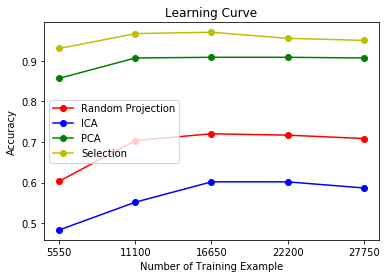

In [68]:
plt.plot(acc_lr_test_rp, 'o-', color="r",
         label="Random Projection")
plt.plot(acc_lr_test_ica, 'o-', color="b",
         label="ICA")
plt.plot(acc_lr_test_pca, 'o-', color="g",
         label="PCA")
plt.plot(acc_lr_test_selection, 'o-', color="y",
         label="Selection")
plt.legend(loc="best")
plt.xticks(np.arange(5), [i for i in range(5550,27751,5550)])
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Example')
plt.title('Learning Curve')
plt.show()

In [47]:
Kmean = KMeans(n_clusters=17,random_state=3,n_init=30, max_iter=3000,tol=1e-7)
Kmean.fit(X_train)

K_label = Kmean.labels_
y_train_kmean_nn = pd.DataFrame(y_train)
y_train_kmean_nn['predict'] = K_label

y_test_kmean_nn = pd.DataFrame(y_test)
y_test_kmean_nn['predict'] = Kmean.predict(X_test)

In [48]:
y_train_kmean_nn_true = y_train_kmean_nn.copy()
y_train_kmean_nn_true['price_range0'] = y_train_kmean_nn_true['price_range'].apply(one_hot_0)
y_train_kmean_nn_true['price_range1'] = y_train_kmean_nn_true['price_range'].apply(one_hot_1)
y_train_kmean_nn_true['price_range2'] = y_train_kmean_nn_true['price_range'].apply(one_hot_2)
y_train_kmean_nn_true['price_range3'] = y_train_kmean_nn_true['price_range'].apply(one_hot_3)

In [49]:
y_train_kmean_nn_pred = []
for i in range(y_train_kmean_nn['predict'].shape[0]):
    a_list = [0 for _ in range(17)]
    a_list[y_train_kmean_nn['predict'].values[i]] = 1
    y_train_kmean_nn_pred.append(a_list)

In [50]:
y_train_kmean_nn_true.columns

Index(['price_range', 'predict', 'price_range0', 'price_range1',
       'price_range2', 'price_range3'],
      dtype='object')

In [51]:
y_train_kmean_true_nn = np.array(y_train_kmean_nn_true[['price_range0','price_range1','price_range2','price_range3']])
y_train_kmean_predict_nn = np.array(y_train_kmean_nn_pred) 

In [52]:
y_test_kmean_nn_true = y_test_kmean_nn.copy()
y_test_kmean_nn_true['price_range0'] = y_test_kmean_nn_true['price_range'].apply(one_hot_0)
y_test_kmean_nn_true['price_range1'] = y_test_kmean_nn_true['price_range'].apply(one_hot_1)
y_test_kmean_nn_true['price_range2'] = y_test_kmean_nn_true['price_range'].apply(one_hot_2)
y_test_kmean_nn_true['price_range3'] = y_test_kmean_nn_true['price_range'].apply(one_hot_3)

y_test_kmean_nn_pred = []
for i in range(y_test_kmean_nn_true['predict'].shape[0]):
    a_list = [0 for _ in range(17)]
    a_list[y_test_kmean_nn['predict'].values[i]] = 1
    y_test_kmean_nn_pred.append(a_list)

y_test_kmean_true_nn = np.array(y_test_kmean_nn_true[['price_range0','price_range1','price_range2','price_range3']])
y_test_kmean_predict_nn = np.array(y_test_kmean_nn_pred) 

In [53]:
node = 20
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x_ph = tf.placeholder('float', [None,17])
y_ph = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model_kmean_label(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([17,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [54]:
accuracy_list=[]
def train_nn_kmean_label(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(y_train_kean_true_nn.shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = y_train_kmean_predict_nn[beg:end]
                ep_y = y_train_kmean_true_nn[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x_ph:y_test_kmean_predict_nn, y_ph:y_test_kmean_true_nn})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [55]:
def train_nn_w_lr(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for j in range(1,6):
            print(j)
            for ep in range(epoch):
                epoch_loss = 0
                for i in range(int(X_train.shape[0]/5/batch_size*j)):
                    beg = i*batch_size
                    end = beg + batch_size
                    ep_x = y_train_kmean_predict_nn[beg:end]
                    ep_y = y_train_kmean_true_nn[beg:end]
    #                 DF                
    #                 ep_x = X_train[beg:end]
    #                 ep_y = y_train[y_train.columns[1:5]][beg:end]

    #                 x = X_train[beg:end]
    #                 y = y_train[beg:end]                
    #                 UnboundLocalError: local variable 'y' referenced before assignment

                    qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
    #                 ValueError: setting an array element with a sequence.
    #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                    epoch_loss += c
                #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
            correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            Acc = accuracy.eval({x_ph:y_train_kmean_predict_nn, y_ph:y_train_kmean_true_nn})
            train_list.append(Acc)
            Acc = accuracy.eval({x_ph:y_test_kmean_predict_nn, y_ph:y_test_kmean_true_nn})
            accuracy_list.append(Acc)
            print('Acc:',Acc)

In [56]:
accuracy_list=[]
train_list = []
train_nn_w_lr(x_ph,nn_model_kmean_label)
acc_lr_test_label_kmean = accuracy_list
acc_lr_train_label_kmean = train_list

1
Acc: 0.21833333
2
Acc: 0.225
3
Acc: 0.24
4
Acc: 0.21833333
5
Acc: 0.22666667


In [57]:
EM = GaussianMixture(n_init=30,n_components=15,init_params='kmeans',random_state=3,covariance_type='full')
EM.fit(X_train)

K_label = EM.predict(X_train)
y_train_EM_nn = pd.DataFrame(y_train)
y_train_EM_nn['predict'] = K_label

K_label = EM.predict(X_test)
y_test_EM_nn = pd.DataFrame(y_test)
y_test_EM_nn['predict'] = K_label

In [58]:
y_train_EM_nn_true = y_train_EM_nn.copy()
y_train_EM_nn_true['price_range0'] = y_train_EM_nn_true['price_range'].apply(one_hot_0)
y_train_EM_nn_true['price_range1'] = y_train_EM_nn_true['price_range'].apply(one_hot_1)
y_train_EM_nn_true['price_range2'] = y_train_EM_nn_true['price_range'].apply(one_hot_2)
y_train_EM_nn_true['price_range3'] = y_train_EM_nn_true['price_range'].apply(one_hot_3)

In [59]:
y_train_EM_nn_pred = []
for i in range(y_train_EM_nn['predict'].shape[0]):
    a_list = [0 for _ in range(15)]
    a_list[y_train_EM_nn['predict'].values[i]] = 1
    y_train_EM_nn_pred.append(a_list)

In [60]:
y_train_EM_true_nn = np.array(y_train_EM_nn_true[['price_range0','price_range1','price_range2','price_range3']])
y_train_EM_predict_nn = np.array(y_train_EM_nn_pred) 

In [61]:
y_test_EM_nn_true = y_test_EM_nn.copy()
y_test_EM_nn_true['price_range0'] = y_test_EM_nn_true['price_range'].apply(one_hot_0)
y_test_EM_nn_true['price_range1'] = y_test_EM_nn_true['price_range'].apply(one_hot_1)
y_test_EM_nn_true['price_range2'] = y_test_EM_nn_true['price_range'].apply(one_hot_2)
y_test_EM_nn_true['price_range3'] = y_test_EM_nn_true['price_range'].apply(one_hot_3)

y_test_EM_nn_pred = []
for i in range(y_test_EM_nn['predict'].shape[0]):
    a_list = [0 for _ in range(15)]
    a_list[y_test_EM_nn['predict'].values[i]] = 1
    y_test_EM_nn_pred.append(a_list)

y_test_EM_true_nn = np.array(y_test_EM_nn_true[['price_range0','price_range1','price_range2','price_range3']])
y_test_EM_predict_nn = np.array(y_test_EM_nn_pred) 

In [62]:
node = 20
n_node_hl1 = node
n_node_hl2 = node

n_classes = 4
batch_size = 50

x_ph = tf.placeholder('float', [None,15])
y_ph = tf.placeholder('int32',[None,4])   ## int didn't work
def nn_model_EM_label(data):
    hidden_1 = {'weights': tf.Variable(tf.random_normal([15,n_node_hl1])),
               'biases': tf.Variable(tf.random_normal([n_node_hl1]))}

    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_node_hl1,n_node_hl2])),
               'biases': tf.Variable(tf.random_normal([n_node_hl2]))}

    output_l = {'weights': tf.Variable(tf.random_normal([n_node_hl2,n_classes])),
             'biases': tf.Variable(tf.random_normal([n_classes]))}


    l1 = tf.add(tf.matmul(data,hidden_1['weights']),hidden_1['biases'])
    l1 = tf.nn.sigmoid(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2['weights']),hidden_2['biases'])
    l2 = tf.nn.sigmoid(l2)

    output = tf.add(tf.matmul(l2, output_l['weights']),output_l['biases'])

    return output

In [63]:
accuracy_list=[]
def train_nn_EM_label(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for ep in range(epoch):
            epoch_loss = 0
            for i in range(int(y_train_kean_true_nn.shape[0]/batch_size)):
                beg = i*batch_size
                end = beg + batch_size
                ep_x = y_train_EM_predict_nn[beg:end]
                ep_y = y_train_EM_true_nn[beg:end]
#                 DF                
#                 ep_x = X_train[beg:end]
#                 ep_y = y_train[y_train.columns[1:5]][beg:end]

#                 x = X_train[beg:end]
#                 y = y_train[beg:end]                
#                 UnboundLocalError: local variable 'y' referenced before assignment
                
                qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
#                 ValueError: setting an array element with a sequence.
#                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                epoch_loss += c
            #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
        correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float'))
        Acc = accuracy.eval({x_ph:y_test_EM_predict_nn, y_ph:y_test_EM_true_nn})
        accuracy_list.append(Acc)
        print('Acc:',Acc)

In [64]:
def train_nn_w_lr(x_ph,model):
    pred = model(x_ph)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y_ph))
    # Array dtype float > int
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.astype.html
    optimizer = tf.train.AdamOptimizer(learning_rate=0.005).minimize(cost)
    
    epoch = 100
    #with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for j in range(1,6):
            for ep in range(epoch):
                epoch_loss = 0
                for i in range(int(X_train.shape[0]/5/batch_size*j)):
                    beg = i*batch_size
                    end = beg + batch_size
                    ep_x = y_train_EM_predict_nn[beg:end]
                    ep_y = y_train_EM_true_nn[beg:end]
    #                 DF                
    #                 ep_x = X_train[beg:end]
    #                 ep_y = y_train[y_train.columns[1:5]][beg:end]

    #                 x = X_train[beg:end]
    #                 y = y_train[beg:end]                
    #                 UnboundLocalError: local variable 'y' referenced before assignment

                    qq, c = sess.run([optimizer,cost],feed_dict= {x_ph:ep_x,y_ph:ep_y})
    #                 ValueError: setting an array element with a sequence.
    #                 TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed
                    epoch_loss += c
                #print('Epoch',ep, 'completed out of', epoch, 'loss',epoch_loss)
            correct = tf.equal(tf.argmax(pred,1),tf.argmax(y_ph,1))
            accuracy = tf.reduce_mean(tf.cast(correct,'float'))
            Acc = accuracy.eval({x_ph:y_train_EM_predict_nn, y_ph:y_train_EM_true_nn})
            train_list.append(Acc)
            Acc = accuracy.eval({x_ph:y_test_EM_predict_nn, y_ph:y_test_EM_true_nn})
            accuracy_list.append(Acc)
            print('Acc:',Acc)

In [66]:
accuracy_list=[]
train_list = []
train_nn_w_lr(x_ph,nn_model_EM_label)
acc_lr_test_label_EM = accuracy_list
acc_lr_train_label_EM = train_list

Acc: 0.22833334
Acc: 0.23166667
Acc: 0.24
Acc: 0.23833333
Acc: 0.245


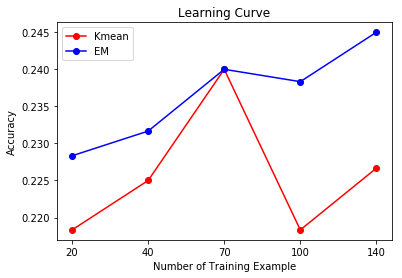

In [67]:
plt.plot(acc_lr_test_label_kmean, 'o-', color="r",
         label="Kmean")
plt.plot(acc_lr_test_label_EM, 'o-', color="b",
         label="EM")
plt.legend(loc="best")
plt.xticks(np.arange(5), [200,400,700,1000,1400])
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Example')
plt.title('Learning Curve')
plt.show()